## The Data
### Airline safety data

The raw data behind the story [Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?](http://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/)

Header | Definition
---|---------
`airline` | Airline (asterisk indicates that regional subsidiaries are included)
`avail_seat_km_per_week` | Available seat kilometers flown every week
`incidents_85_99` | Total number of incidents, 1985–1999
`fatal_accidents_85_99` | Total number of fatal accidents, 1985–1999
`fatalities_85_99` | Total number of fatalities, 1985–1999
`incidents_00_14` | Total number of incidents, 2000–2014
`fatal_accidents_00_14` | Total number of fatal accidents, 2000–2014
`fatalities_00_14` | Total number of fatalities, 2000–2014

Source: [Aviation Safety Network](http://aviation-safety.net)


In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the data

In [2]:
#Reading the data as a Pandas dataframe called 'df'
df = pd.read_csv('airline-safety.csv')

Now that we have all the data, we can see the head of it (the first 5 rows).

In [3]:
df.head()

airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                      0                 0  
3                      0                 0  
4                      0                 0

### Now let's do some quick Exploratory Data Analysis(EDA) on this data by calling the info() and describe() methods.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [5]:
df.describe()

avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
count            5.600000e+01        56.000000              56.000000   
mean             1.384621e+09         7.178571               2.178571   
std              1.465317e+09        11.035656               2.861069   
min              2.593733e+08         0.000000               0.000000   
25%              4.740362e+08         2.000000               0.000000   
50%              8.029089e+08         4.000000               1.000000   
75%              1.847239e+09         8.000000               3.000000   
max              7.139291e+09        76.000000              14.000000   

       fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
count         56.000000        56.000000              56.000000   
mean         112.410714         4.125000               0.660714   
std          146.691114         4.544977               0.858684   
min            0.000000         0.000000               0.000000   
25%            0.000000         1.000000               0.000000   
50%           48.500000         3.000000               0.000000   
75%          184.250000         5.250000               1.000000   
max          535.000000        24.000000               3.000000   

       fatalities_00_14  
count         56.000000  
mean          55.517857  
std          111.332751  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%           83.250000  
max          537.000000

From the **.info()** method, we can see that this is actually a really small dataframe with only **56 rows and 8 columns**. Though it is a small dataframe, we should consider that each row represents an airline, so we have information on 56 airlines here, which is a good number in this case.

We can take quite a few information from the **.describe()** method:

* Looking at the **mean** row:
    * In average the airlines had, between 1985 and 1999, 7 incidents, 2 fatal accidents and 112 fatalities.
    * In average the airlines had, between 2000 and 2014, 4 incidents, 0 fatal accidents and 55 fatalities.


* Looking at the **max** row:
    * One or more of the companies had, from 1985 to 1999, 76 incidents, 14 fatal accidents and 535 fatalities (not necessarily the same company or companies).
    * One or more of the companies had, from 2000 to 2014, 24 incidents, 3 fatal accidents and 537 fatalities (not necessarily the same company or companies).
    

#### Let's continue our initial studies with a **heatmap**:

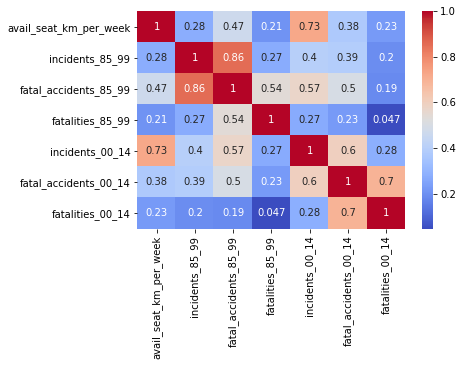

In [6]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

The values on each square represent our linear correlation coefficient. By taking a look at this heatmap, we can see that there are **strong linear correlations** between:

* The number of fatal accidents and the number of fatalities from 2000 to 2014 (0.7);
* Number of fatal accidents and number of incidents from 1985 to 1999 (0.86).

The rest isn't really considerable, since it is expected to see some correlation between some of these. Some of the coefficient values also don't really mean anything.

The ones listed above are the ones that really caught my attention.

**Reminder**: Available seat miles (ASM) or Available seat kilometres (ASK) is a measure of an airline flight's passenger carrying capacity. It is equal to the number of seats available multiplied by the number of miles or kilometres flown.

In [7]:
#just checking for any null values. In this case there are none
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

# Further EDA

In [8]:
df.head()

airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                      0                 0  
3                      0                 0  
4                      0                 0

Let's do a 'total' column for incidents,fatal accidents and fatalities. It might be useful.

In [9]:
df['total_incidents'] = df['incidents_85_99'] + df['incidents_00_14']

In [10]:
df['total_fatal_accidents'] = df['fatal_accidents_85_99'] + df['fatal_accidents_00_14']
df['total_fatalities'] = df['fatalities_00_14'] + df['fatalities_85_99']

In [11]:
df.head()

airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  total_incidents  \
0                      0                 0                2   
1                      1                88               82   
2                      0                 0                7   
3                      0                 0                8   
4                      0                 0                4   

   total_fatal_accidents  total_fatalities  
0                      0                 0  
1                     15               216  
2                      0                 0  
3                      1                64  
4                      0                 0

Again using describe but to see the **means**

In [12]:
#taking the mean row from describe.
df.describe().loc['mean']

avail_seat_km_per_week    1.384621e+09
incidents_85_99           7.178571e+00
fatal_accidents_85_99     2.178571e+00
fatalities_85_99          1.124107e+02
incidents_00_14           4.125000e+00
fatal_accidents_00_14     6.607143e-01
fatalities_00_14          5.551786e+01
total_incidents           1.130357e+01
total_fatal_accidents     2.839286e+00
total_fatalities          1.679286e+02
Name: mean, dtype: float64

There we can see the means of every value.

### Now is a good time to do some plots using matplotlib and seaborn.

# Analyzing Incidents

## In 1985-1999:

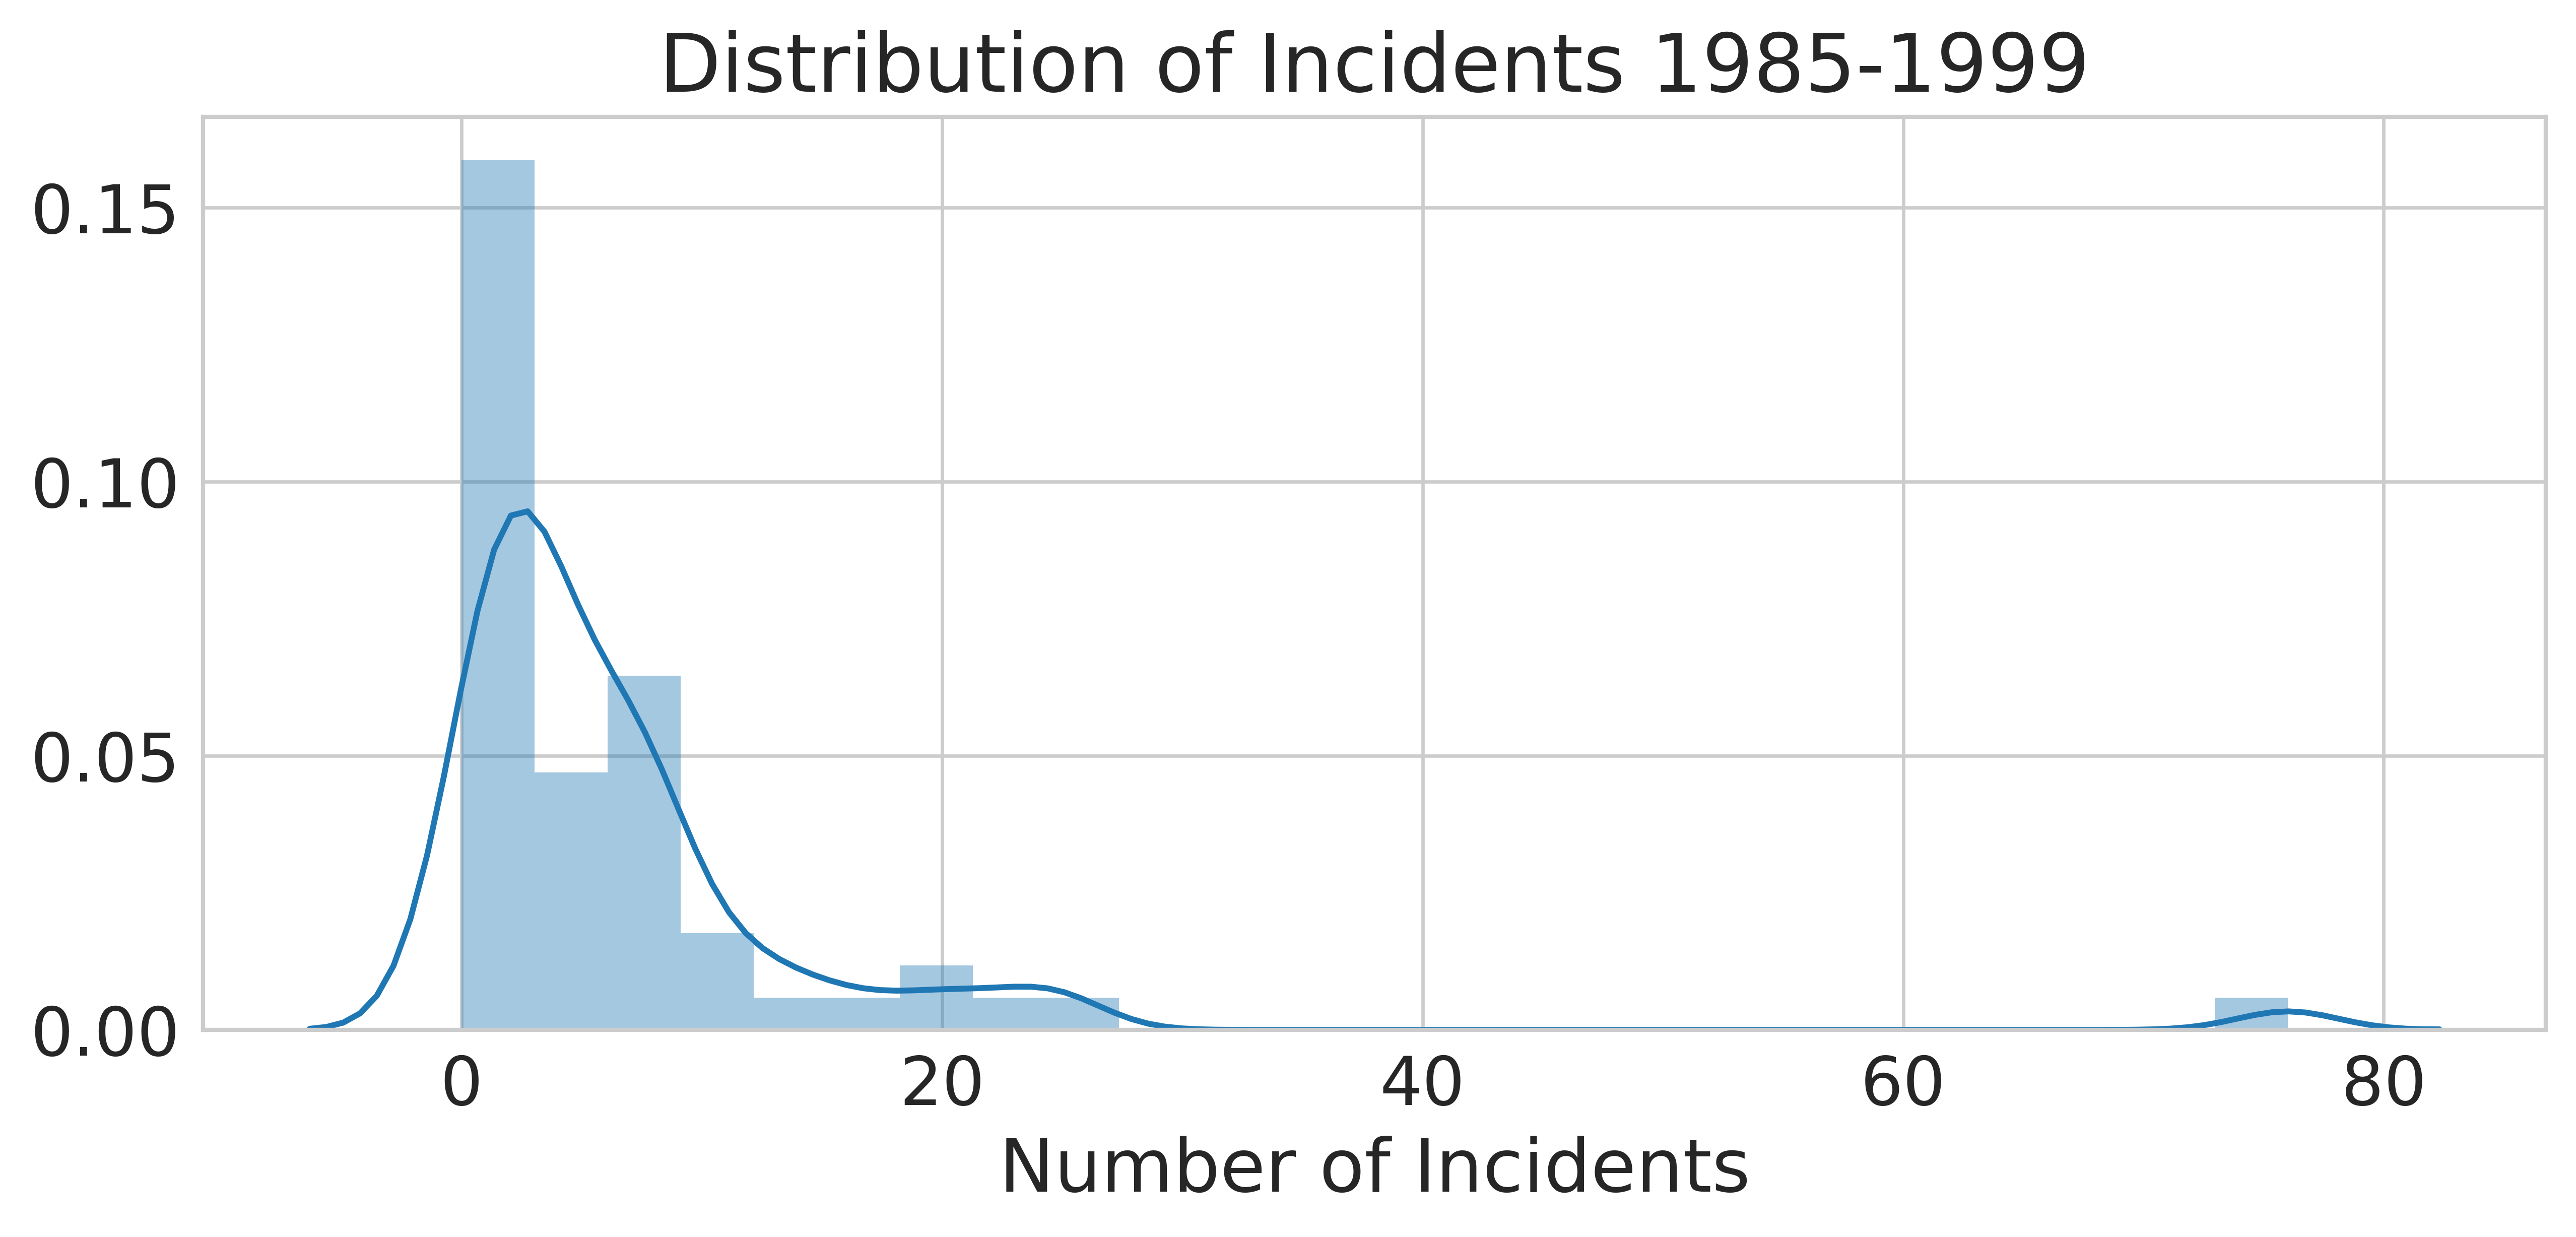

In [13]:
#Just setting the style for the plots on this notebook.
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)

plt.figure(figsize=(10,4),dpi=600)

#setting the title
plt.title('Distribution of Incidents 1985-1999')

#doing a distribution plot of the incidents between 1985-1999
sns.distplot(df['incidents_85_99'])

#setting the x label
plt.xlabel('Number of Incidents')

#saving the figure
plt.savefig('dist_inc_85_99.png')

Looks like the number of incidents is distributed around 0 ~ 5.

We can ignore those airlines with more than 40 incidents (in this case it's only Aeroflot, with 76 incidents, as we find out after this) to get a better view of the distribution.

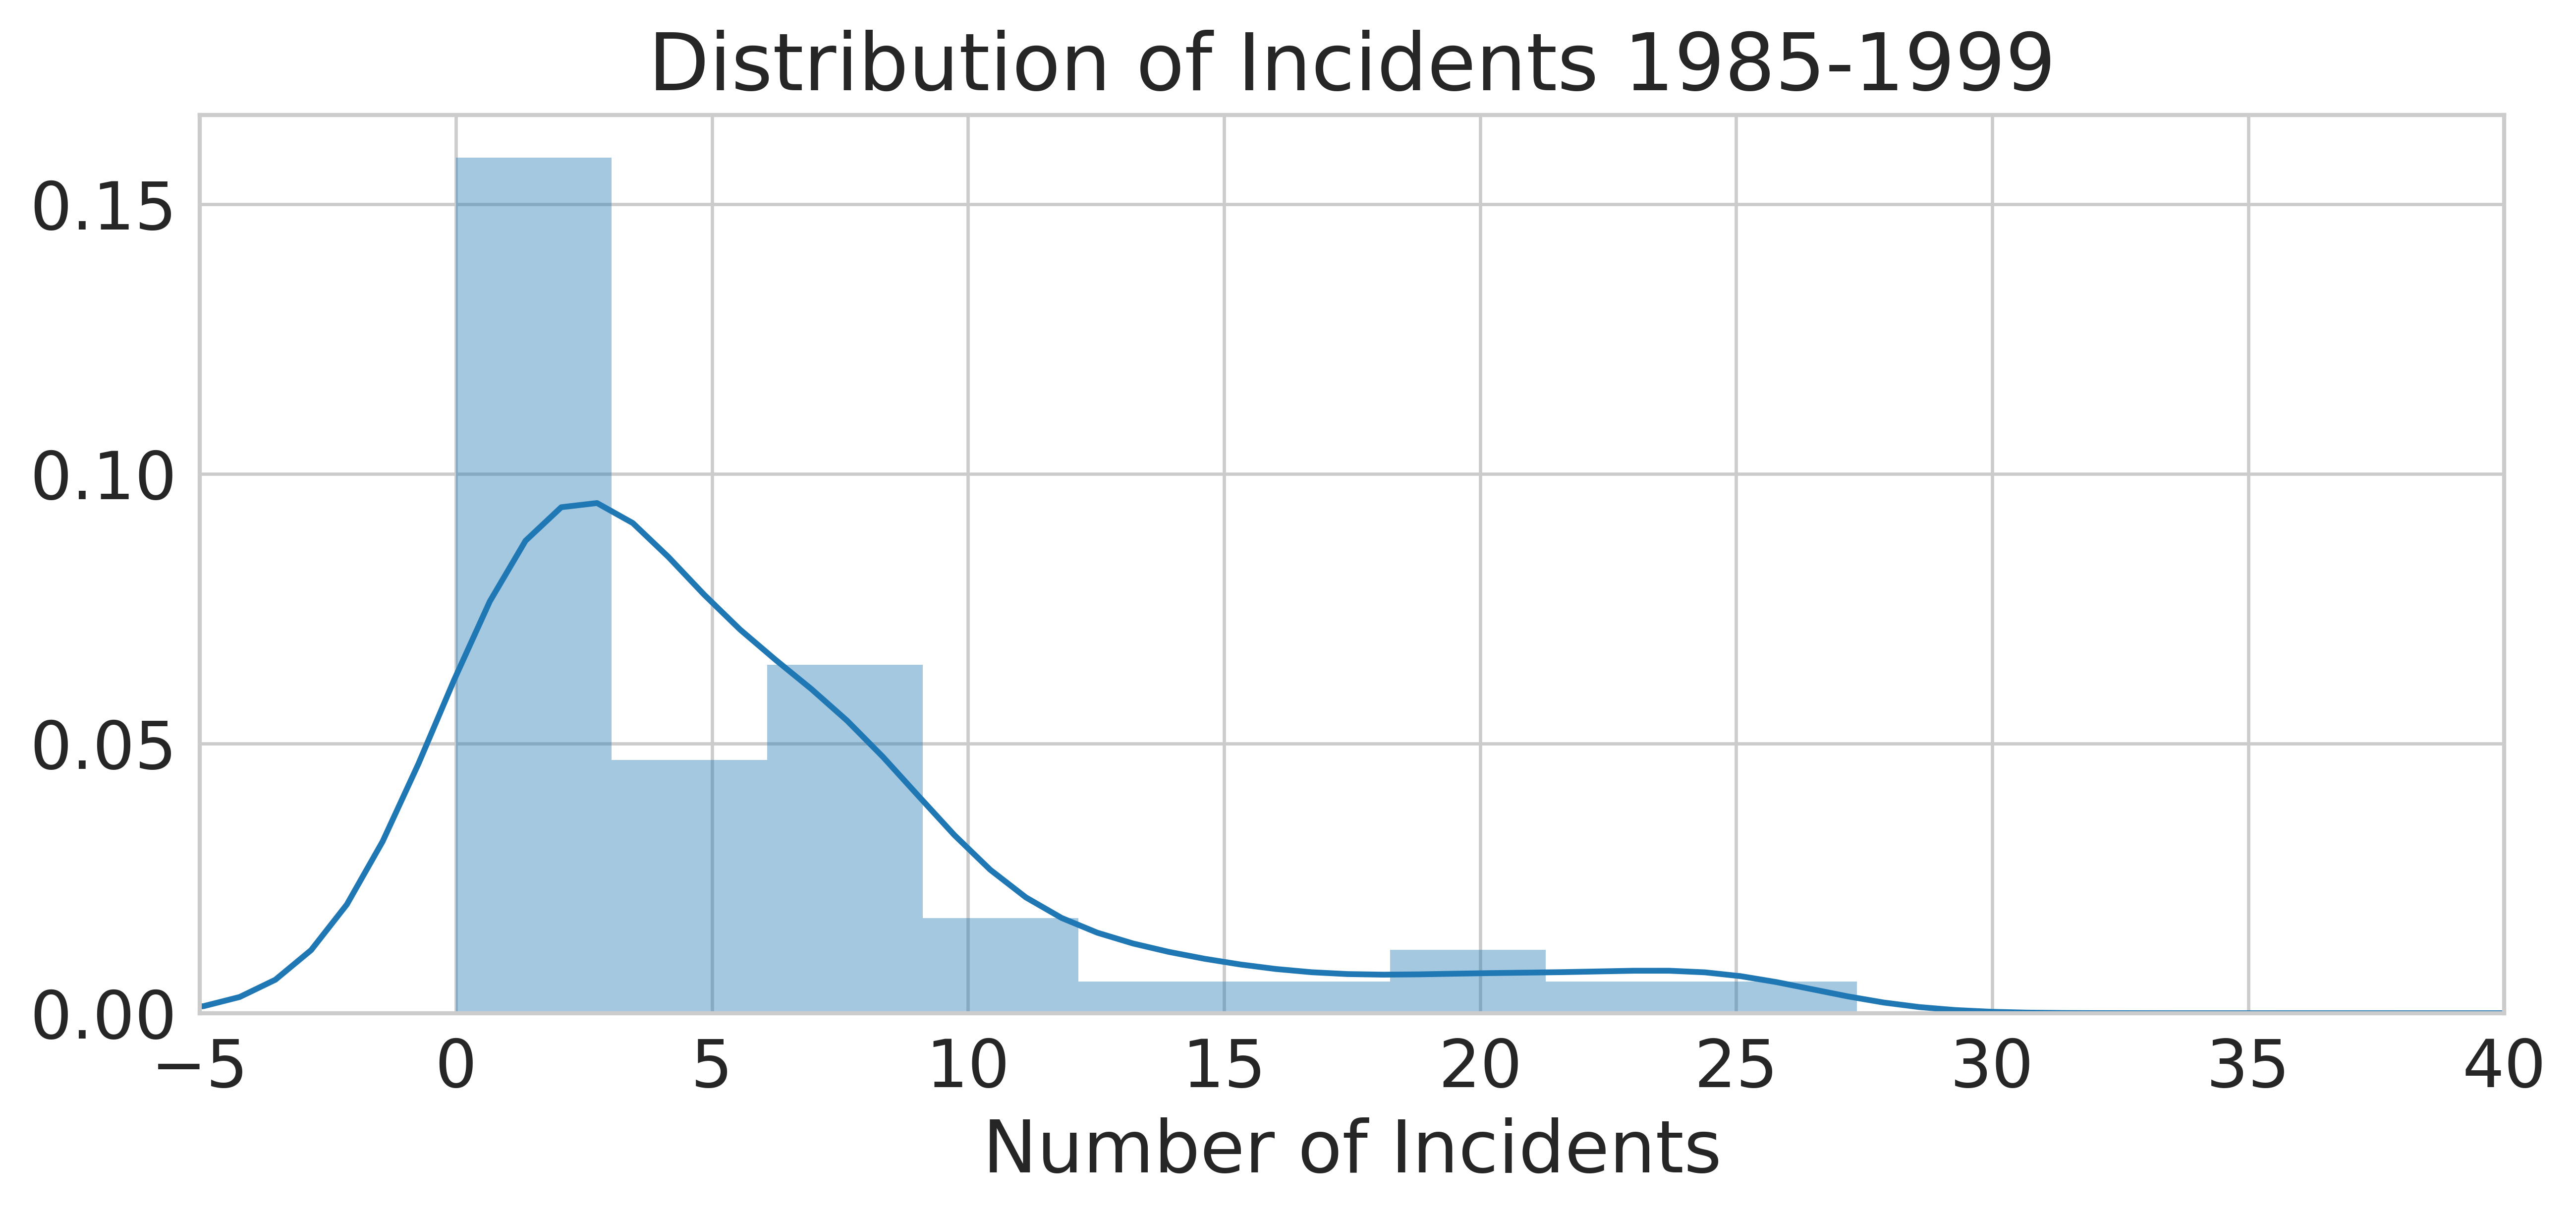

In [14]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Incidents 1985-1999')

#doing a distribution plot of the incidents between 1985-1999
sns.distplot(df['incidents_85_99'])

#just zooming, basically
plt.xlim(-5,40)

plt.xlabel('Number of Incidents')

#saving the figure
plt.savefig('dist_inc_85_99_zoomed.png')

Let's check the airlines with the most incidents during 1985-1999! To do so, we'll have to change our data a bit.

In [15]:
df.head()

airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  total_incidents  \
0                      0                 0                2   
1                      1                88               82   
2                      0                 0                7   
3                      0                 0                8   
4                      0                 0                4   

   total_fatal_accidents  total_fatalities  
0                      0                 0  
1                     15               216  
2                      0                 0  
3                      1                64  
4                      0                 0

In [16]:
df.set_index('airline', inplace=True)
#changing the column 'airline' to now be the index.

### Checking the 5 airlines with the most incidents during 1985-1999

In [17]:
df['incidents_85_99'].sort_values(ascending=False).head(5)

airline
Aeroflot*                76
Ethiopian Airlines       25
Delta / Northwest*       24
American*                21
United / Continental*    19
Name: incidents_85_99, dtype: int64

**Those are the 10 airlines with the most incidents during 1985-1999. Aeroflot is on top.**

Let's make a visualization for this to look better.

In [18]:
#Just assigning a copy of the values above to a variable
top5 = df['incidents_85_99'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Incidents 85-99'])

#calling it
top5_df

Number of Incidents 85-99
airline                                         
Aeroflot*                                     76
Ethiopian Airlines                            25
Delta / Northwest*                            24
American*                                     21
United / Continental*                         19

In [19]:
top5_df.reset_index(inplace=True)

In [20]:
top5_df

airline  Number of Incidents 85-99
0              Aeroflot*                         76
1     Ethiopian Airlines                         25
2     Delta / Northwest*                         24
3              American*                         21
4  United / Continental*                         19

Let's remove those asterisks from the names.

In [21]:
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

In [22]:
top5_df

airline  Number of Incidents 85-99
0              Aeroflot                         76
1    Ethiopian Airlines                         25
2     Delta / Northwest                         24
3              American                         21
4  United / Continental                         19

Now we can plot it! Let's do a nice count plot.

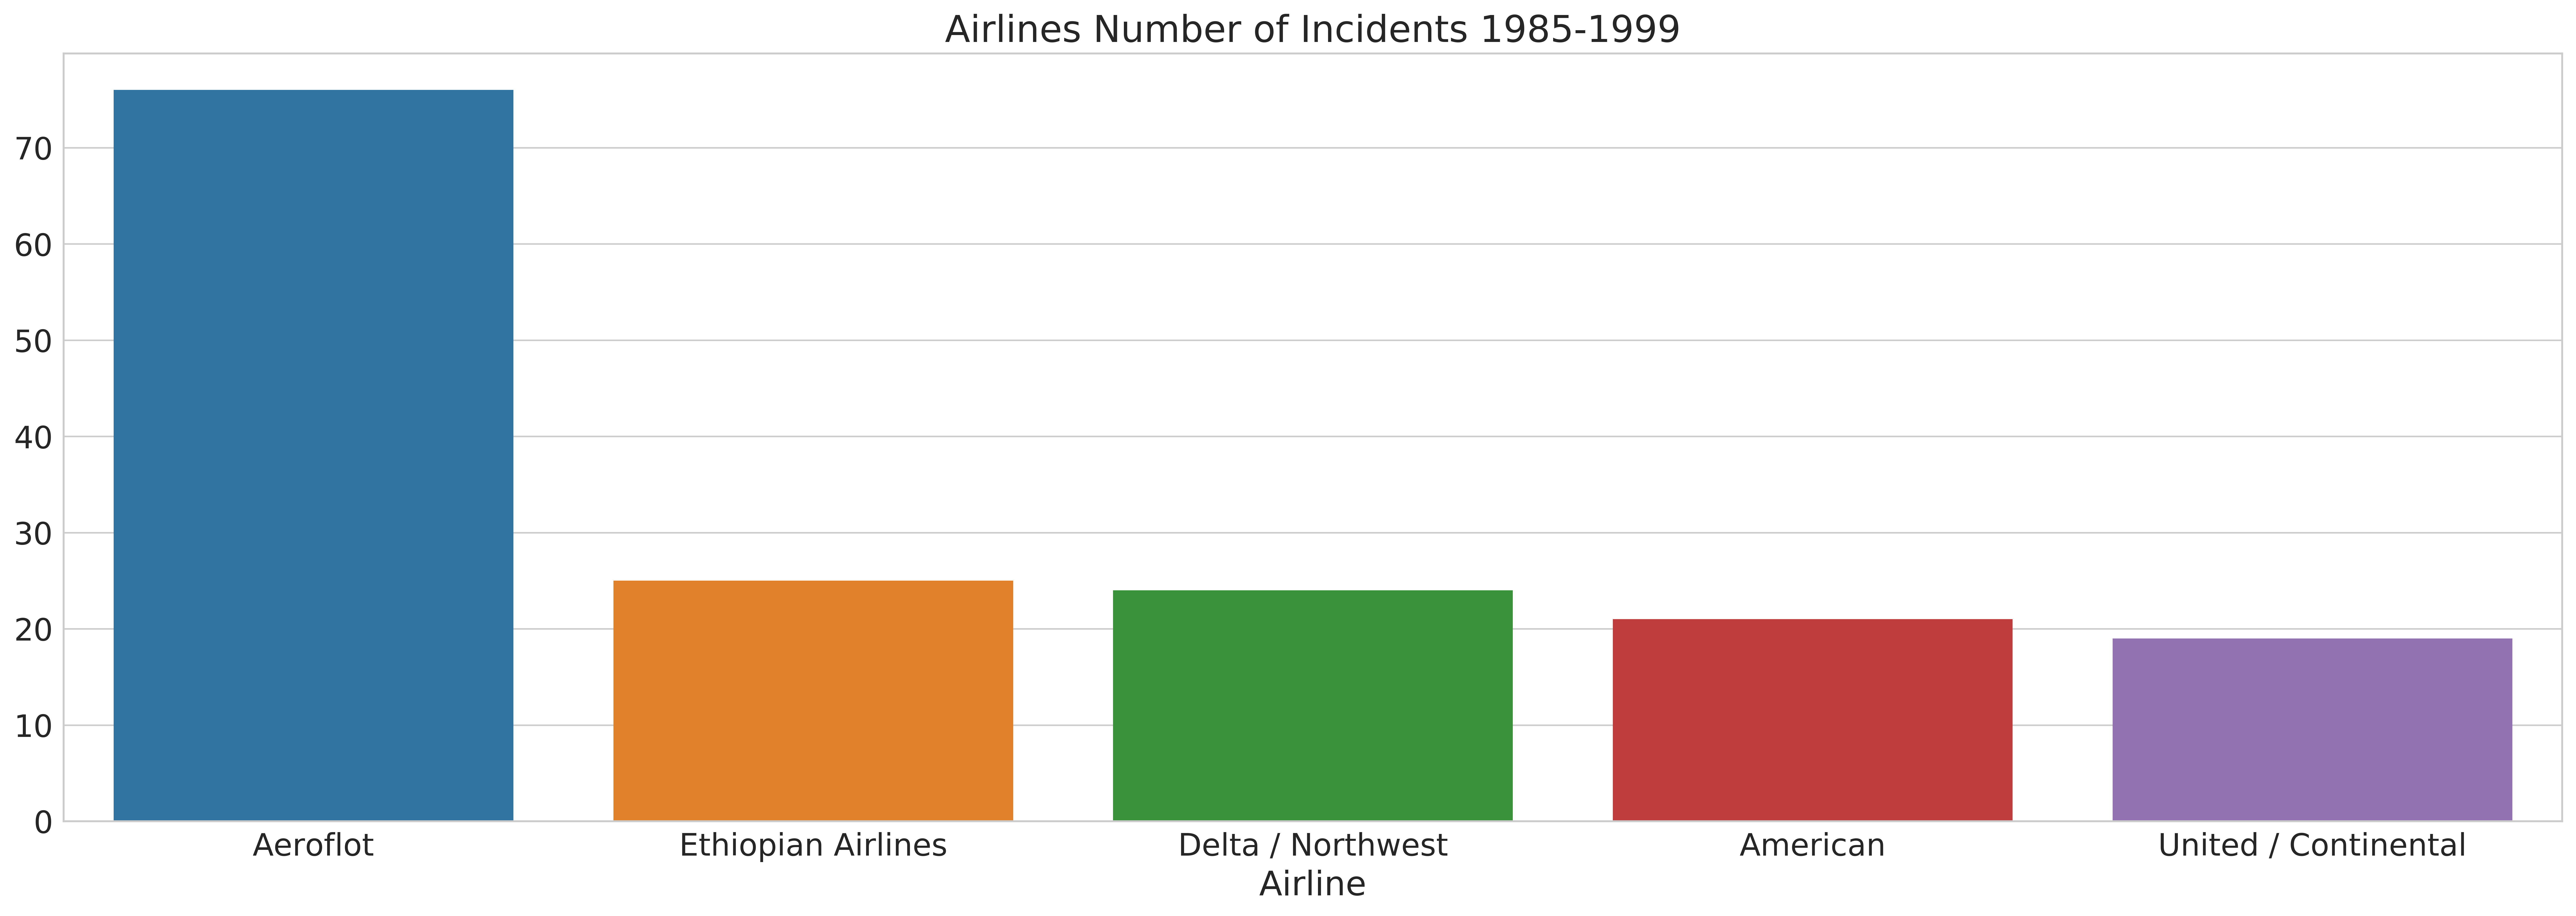

In [23]:
plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Incidents 85-99', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Incidents 1985-1999')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nincidents_85_99.png')

## In 2000-2014

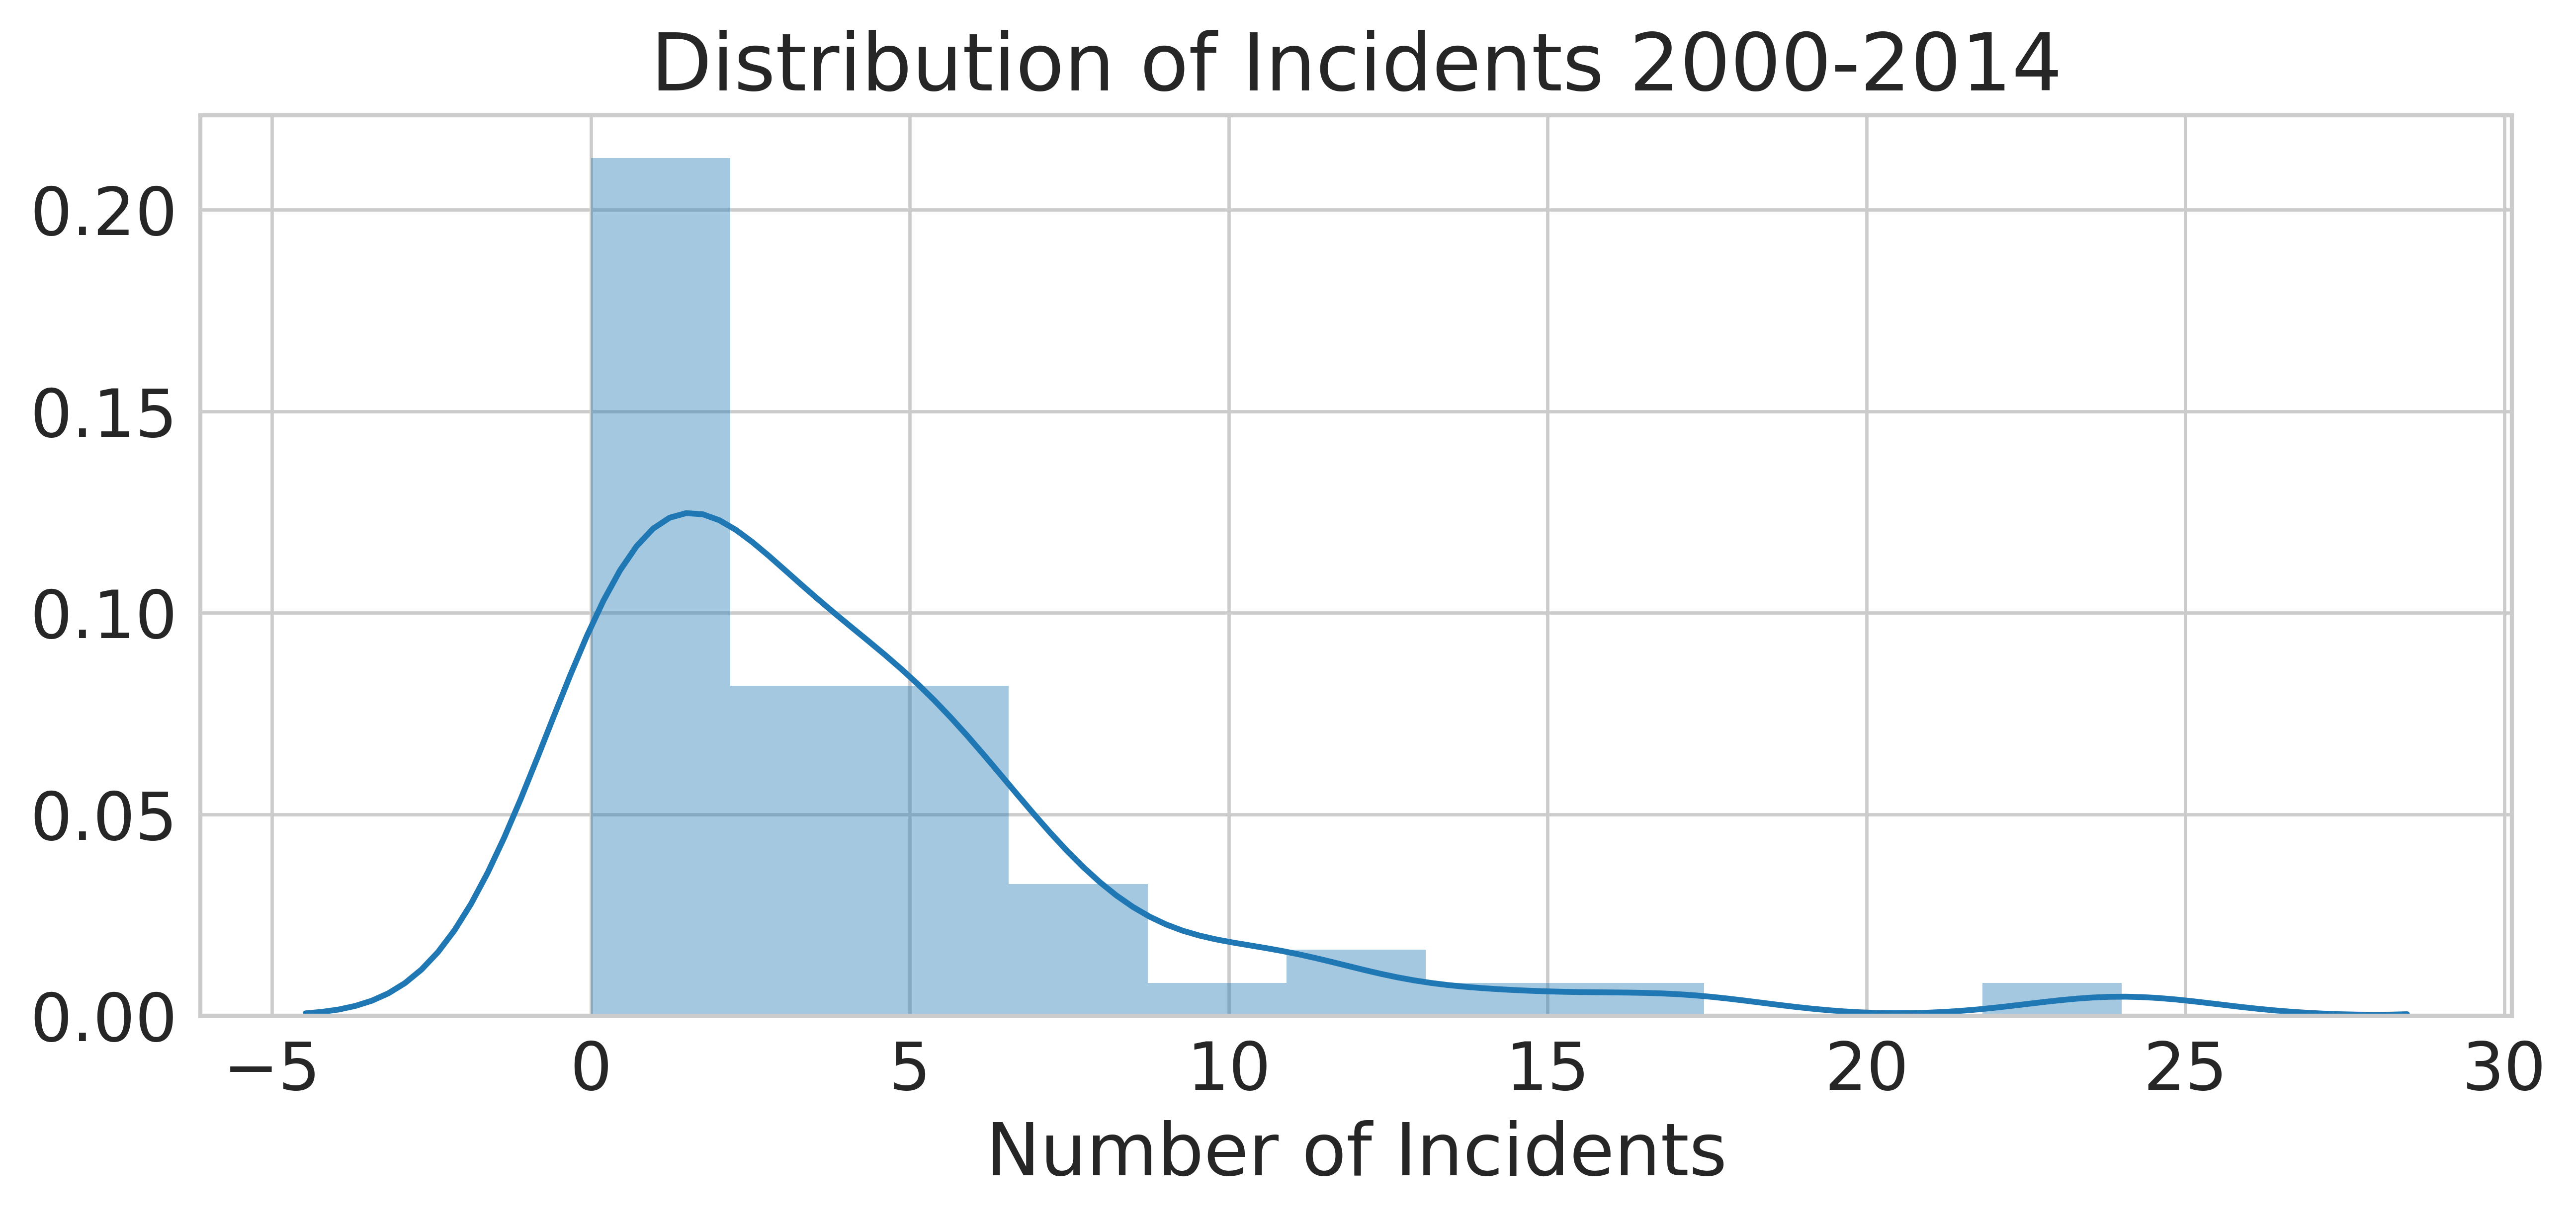

In [24]:
plt.figure(figsize=(10,4),dpi=600)

plt.title('Distribution of Incidents 2000-2014')

#doing a distribution plot of the incidents between 2000-2014
sns.distplot(df['incidents_00_14'])

plt.xlabel('Number of Incidents')

#saving the figure
plt.savefig('dist_inc_00_14.png')

### Checking the 5 airlines with the most incidents during 2000-2014

In [25]:
df['incidents_00_14'].sort_values(ascending=False).head(5)

airline
Delta / Northwest*            24
American*                     17
United / Continental*         14
US Airways / America West*    11
Saudi Arabian                 11
Name: incidents_00_14, dtype: int64

**Those are the 5 airlines with the most incidents during 2000-2014. Delta/Northwest is on top.**

#### Making a visualization for this just like before:

In [26]:
#Just assigning a copy of the values above to a variable
top5 = df['incidents_00_14'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Incidents 2000-2014'])

#calling it
top5_df

Number of Incidents 2000-2014
airline                                                  
Delta / Northwest*                                     24
American*                                              17
United / Continental*                                  14
US Airways / America West*                             11
Saudi Arabian                                          11

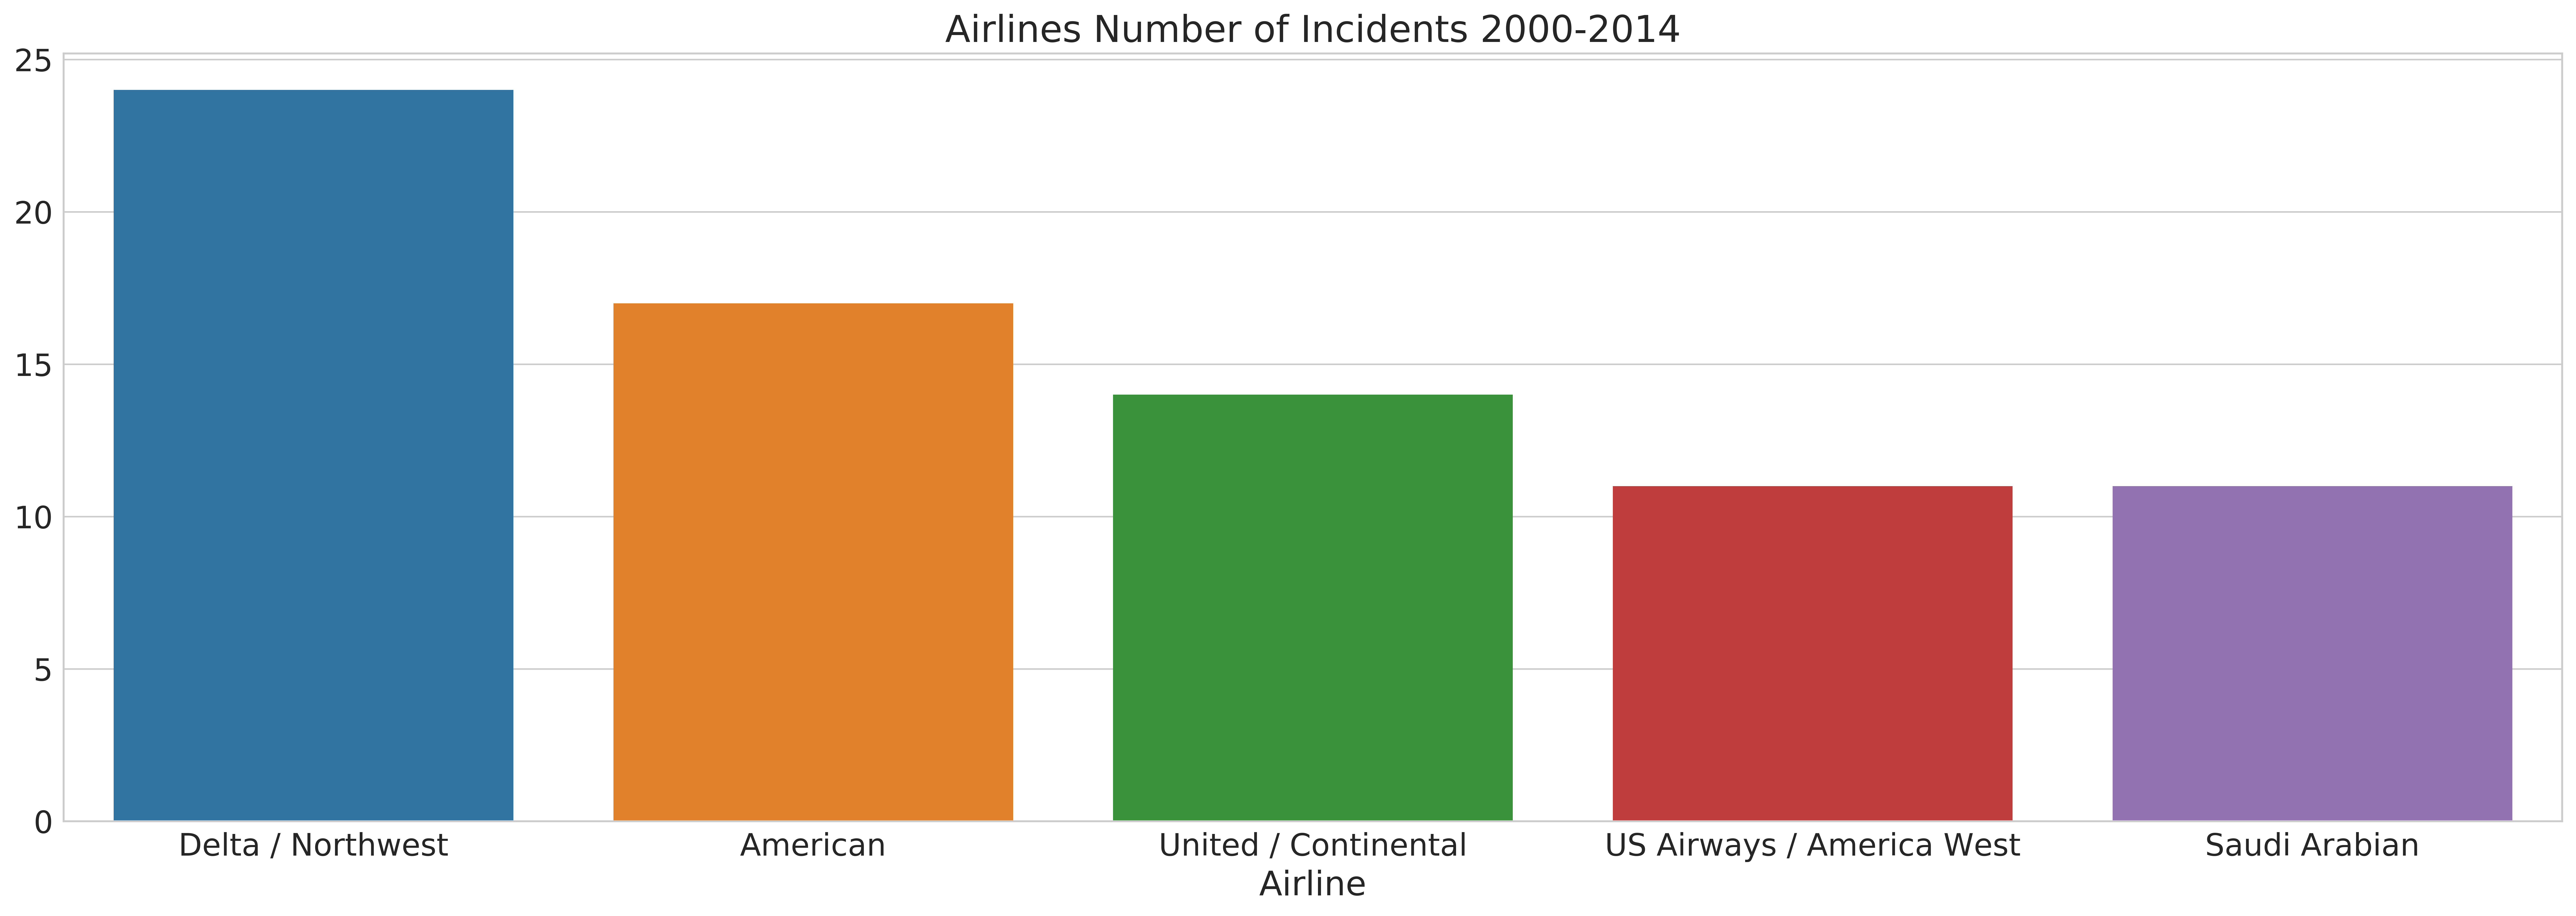

In [27]:
#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Incidents 2000-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Incidents 2000-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nincidents_00_14.png')

## All time (1985-2014)

Now we'll make use of the 'total' columns we created.

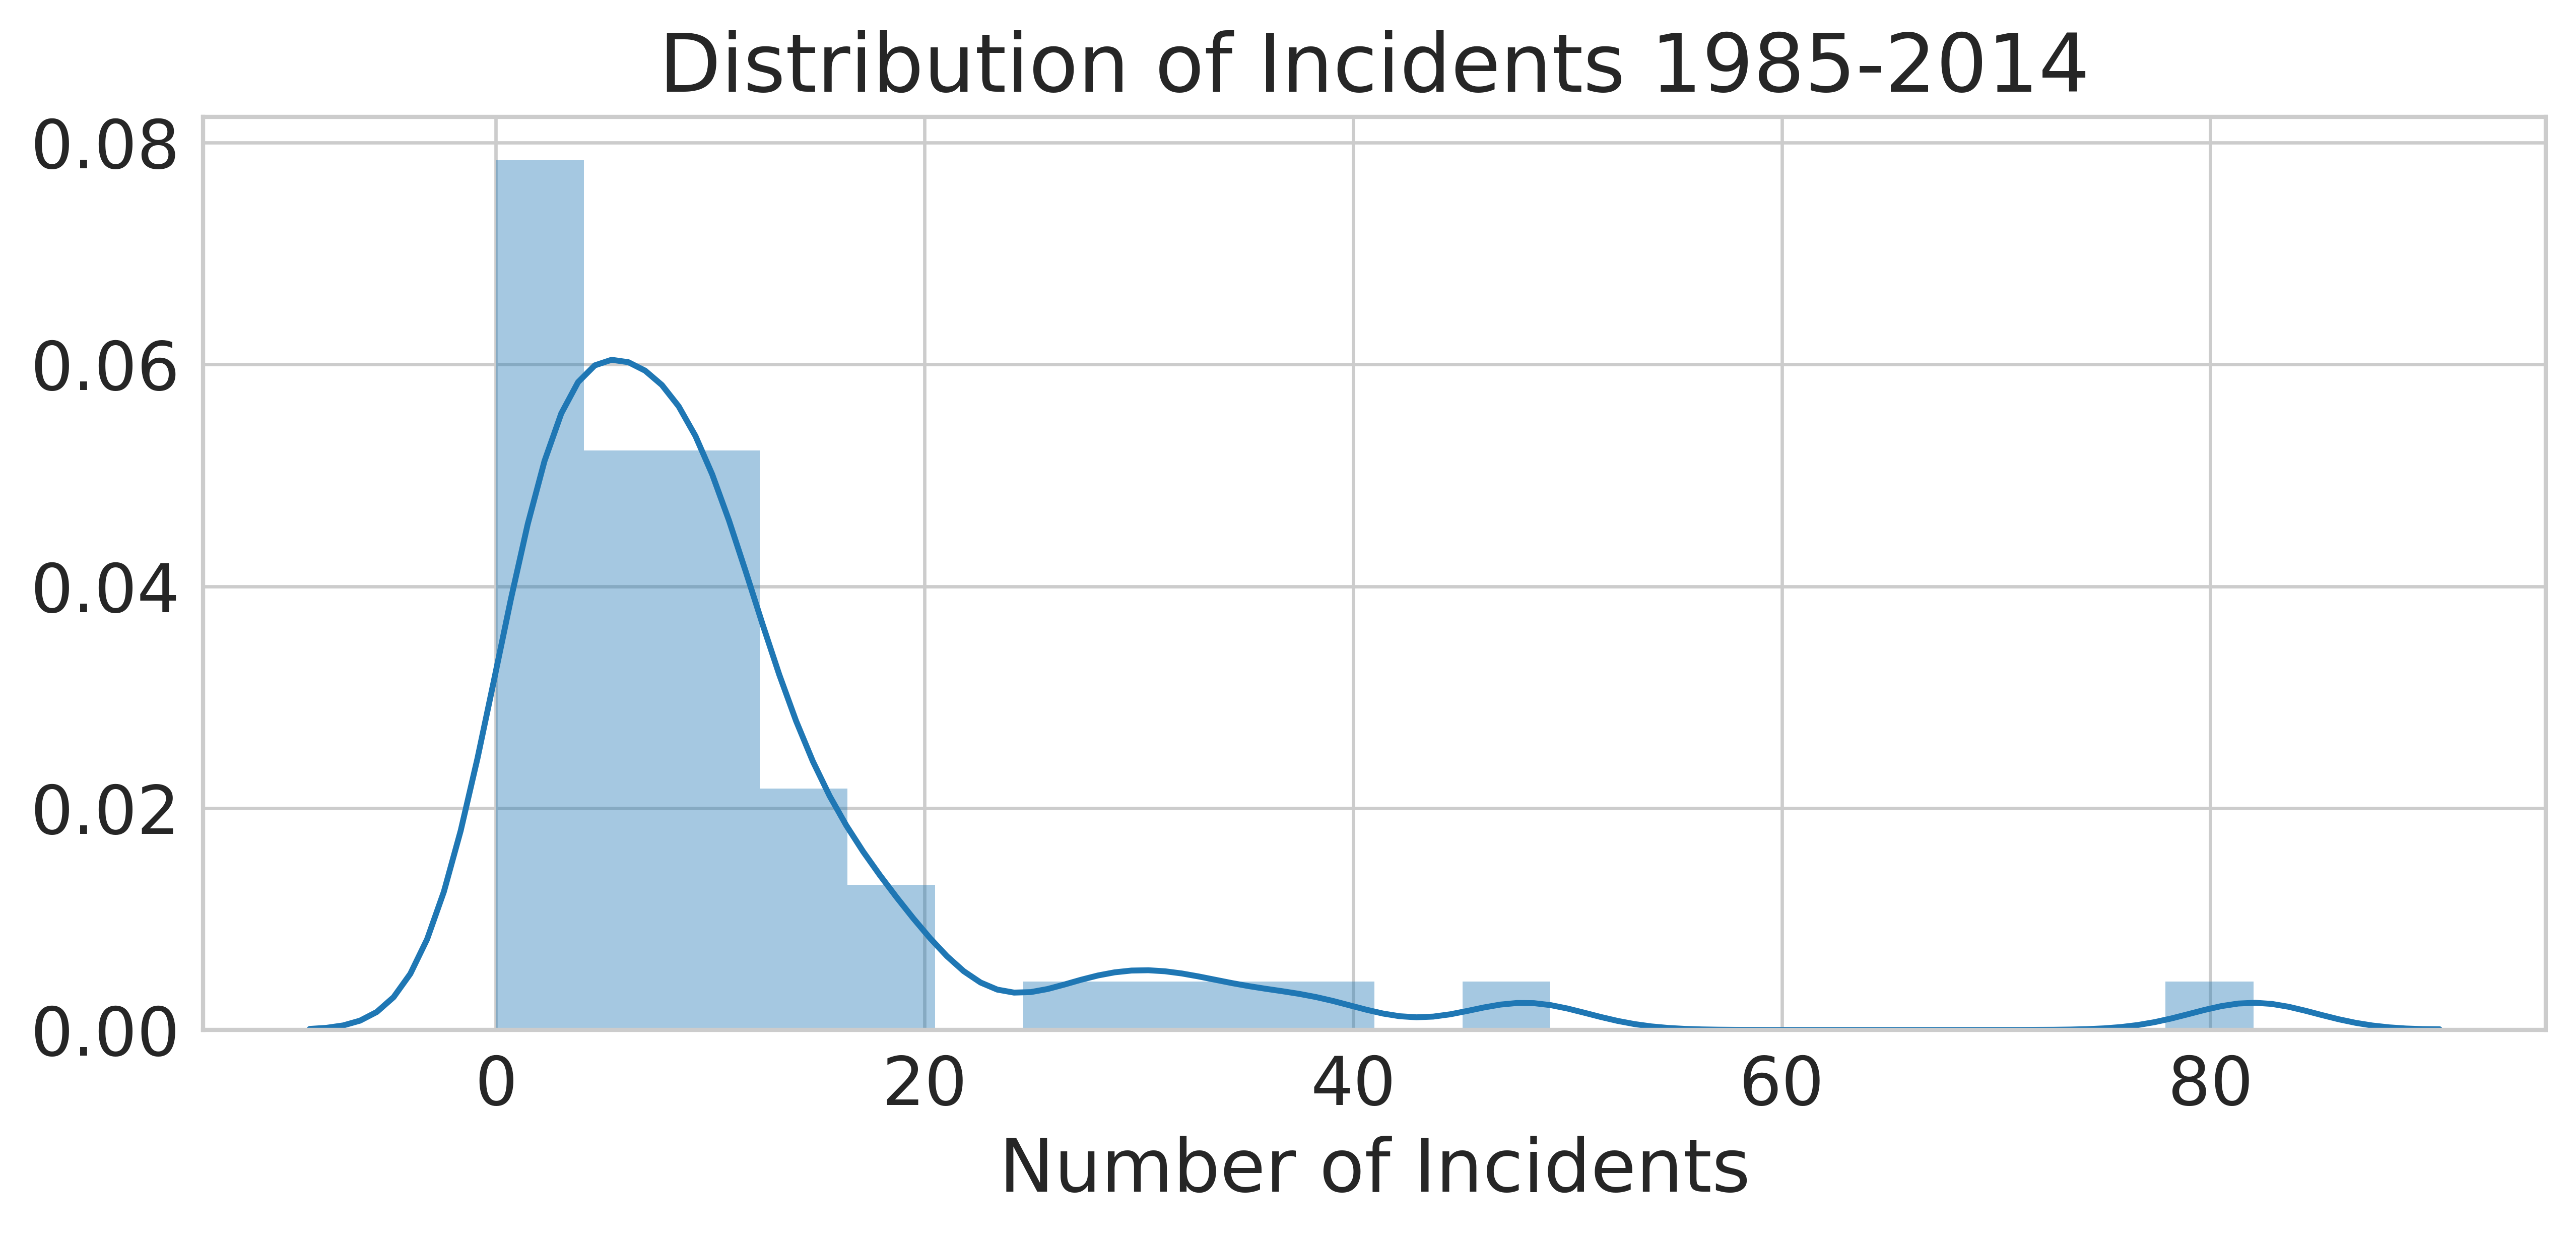

In [28]:
plt.figure(figsize=(10,4),dpi=600)

#doing a distribution plot of the incidents between 1985-2014
sns.distplot(df['total_incidents'])

plt.title('Distribution of Incidents 1985-2014')

plt.xlabel('Number of Incidents')

#saving the figure
plt.savefig('dist_inc_85_14.png')

Let's see if the number of incidents has changed significantly from 1985-1999 to 2000-2014:

In [29]:
df['incidents_85_99'].sum()

402

In [30]:
df['incidents_00_14'].sum()

231

They did change significantly.

### Checking the airlines with the most incidents during 1985-2014

In [31]:
df['total_incidents'].sort_values(ascending=False).head(5)

airline
Aeroflot*                82
Delta / Northwest*       48
American*                38
United / Continental*    33
Ethiopian Airlines       30
Name: total_incidents, dtype: int64

#### Same as before:

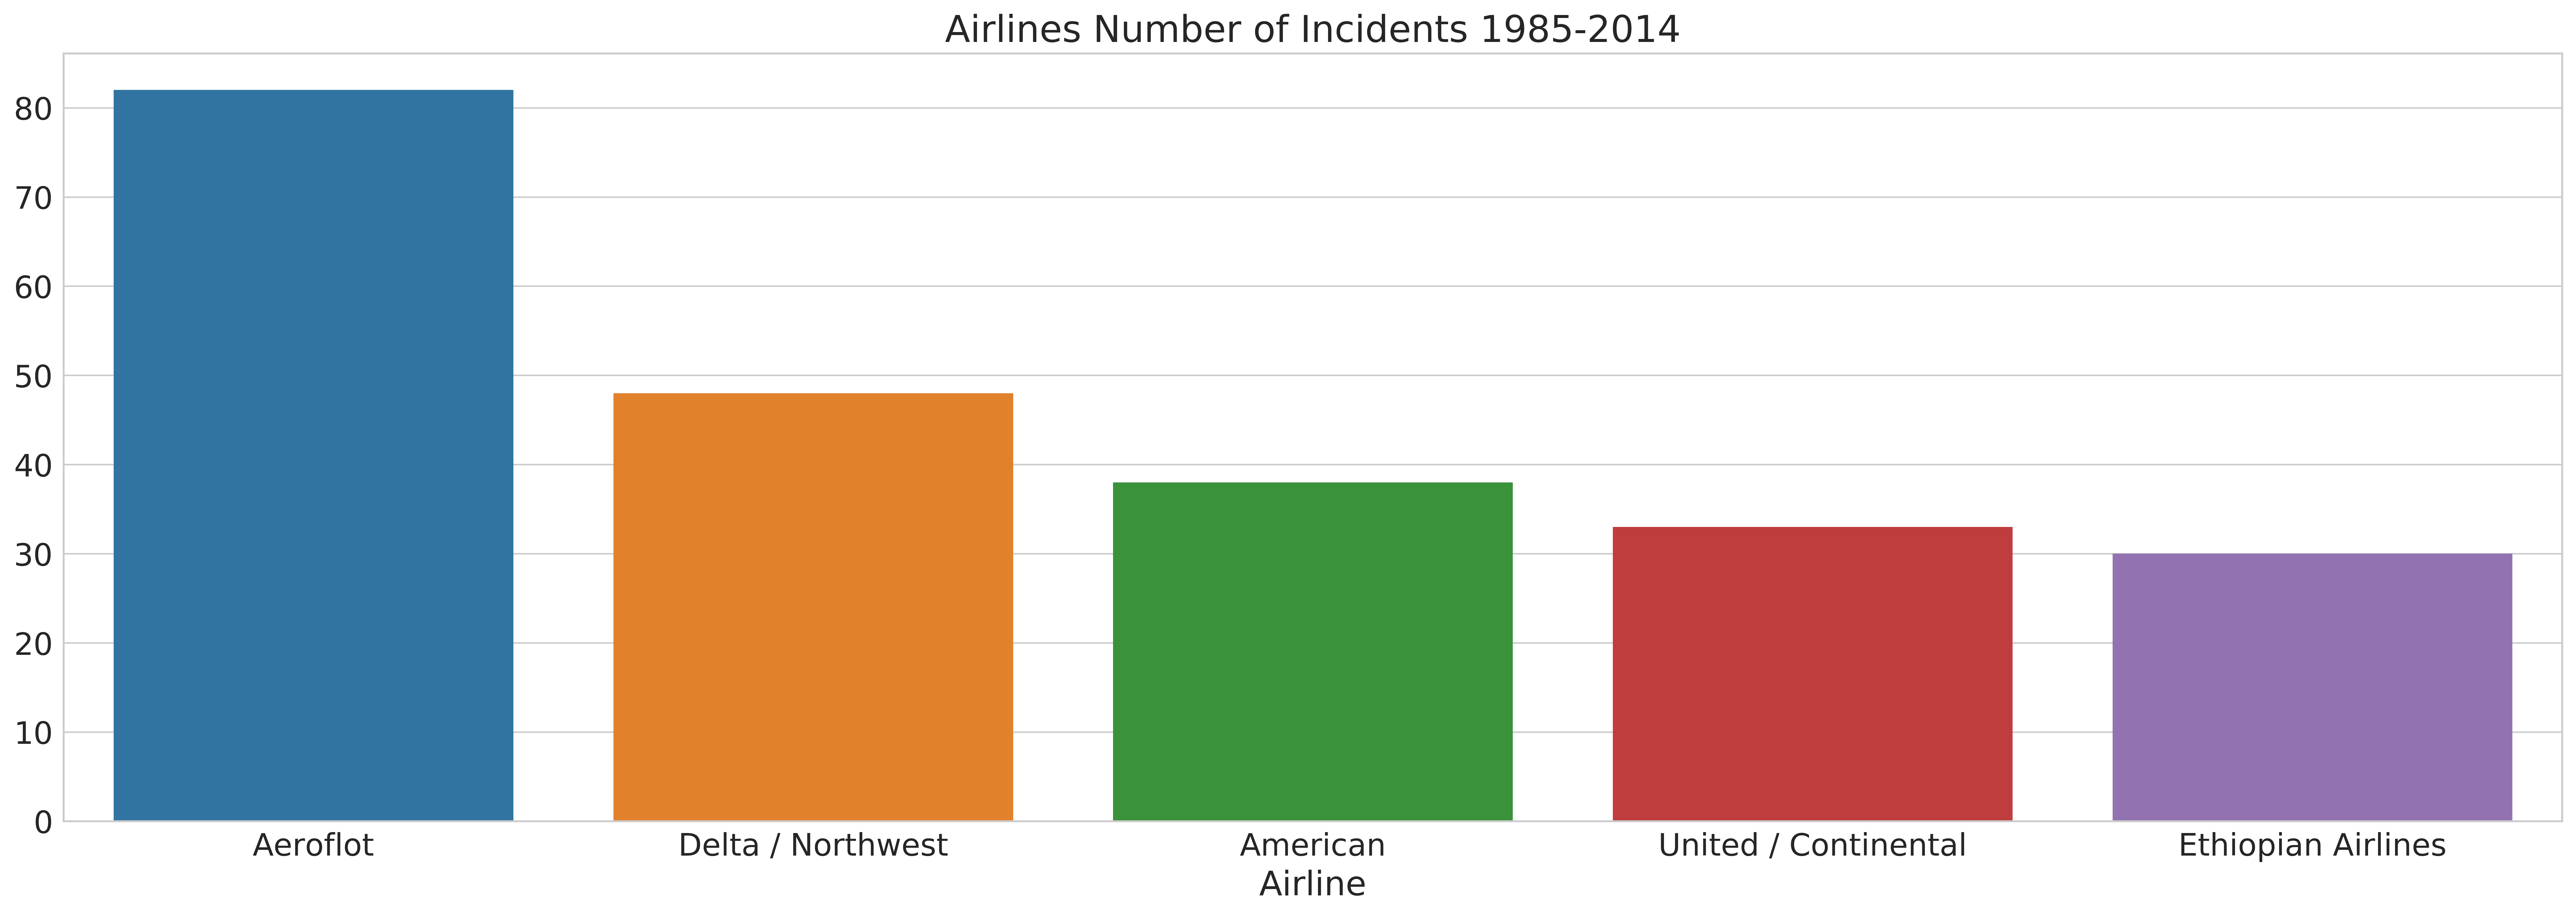

In [32]:
#Just assigning a copy of the values above to a variable
top5 = df['total_incidents'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Incidents 1985-2014'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Incidents 1985-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Incidents 1985-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nincidents_85_14.png')

# Analyzing Fatal Accidents

## 1985-1999

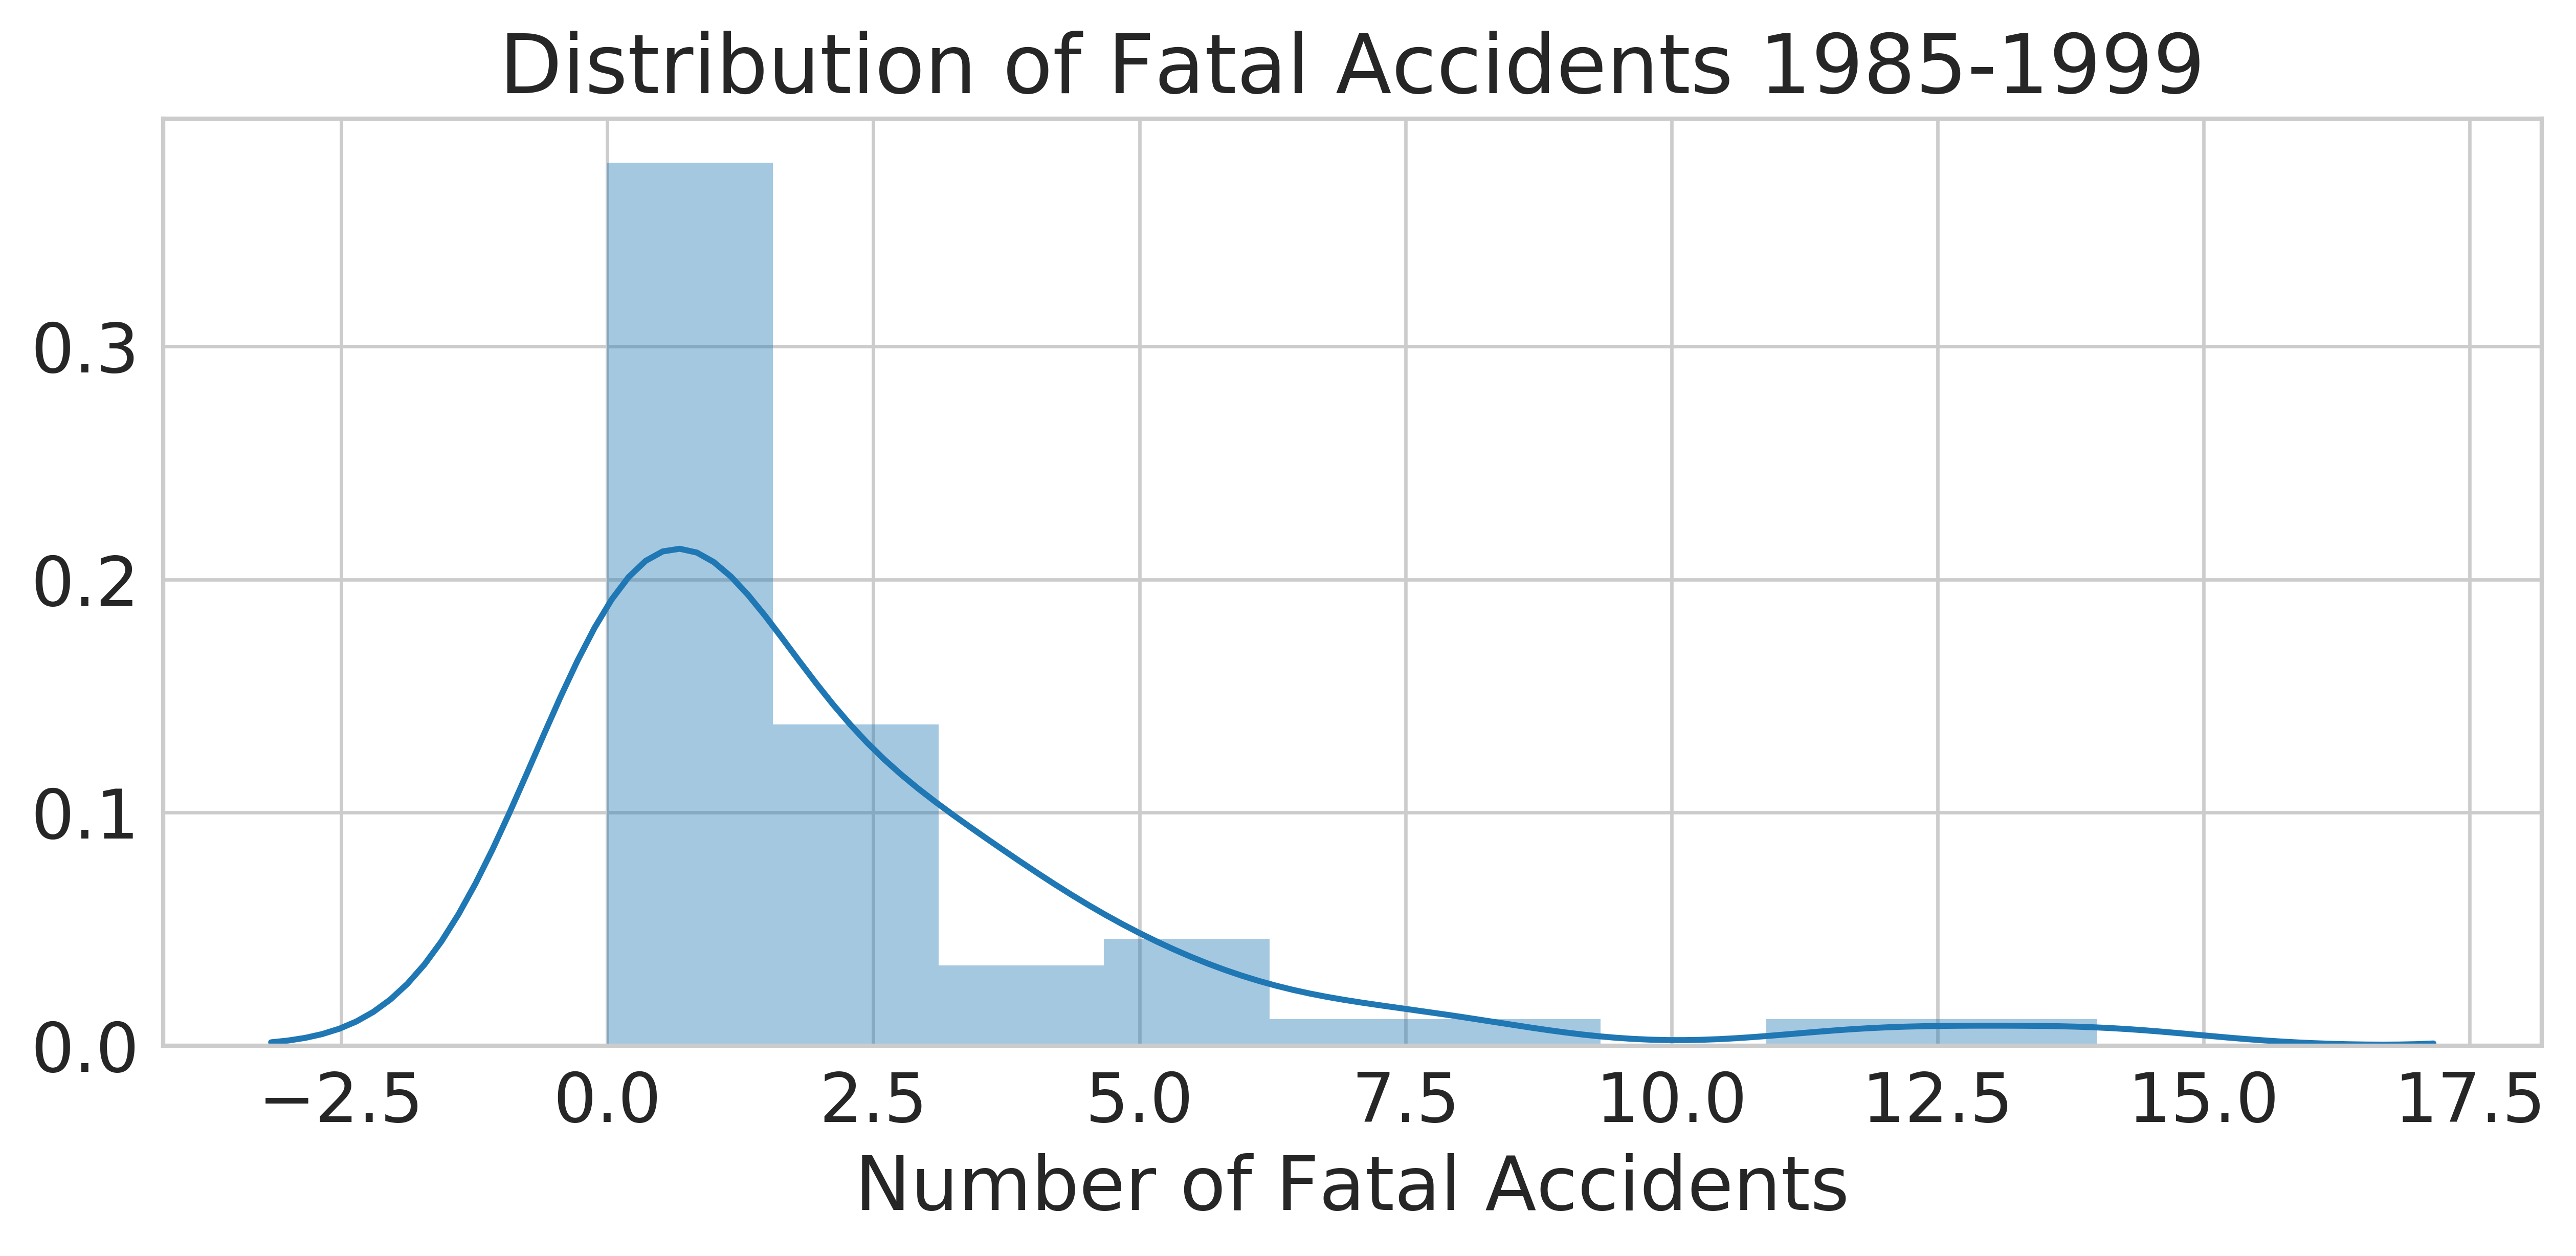

In [33]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatal Accidents 1985-1999')

#doing a distribution plot of the fatal accidents between 1985-1999
sns.distplot(df['fatal_accidents_85_99'])

plt.xlabel('Number of Fatal Accidents')

#saving the figure
plt.savefig('dist_fatalac_85_99.png')

### Let's see the 5 airlines with the most number of fatal accidents during 1985-1999

In [34]:
df['fatal_accidents_85_99'].sort_values(ascending=False).head(5)

airline
Aeroflot*                     14
Delta / Northwest*            12
United / Continental*          8
US Airways / America West*     7
China Airlines                 6
Name: fatal_accidents_85_99, dtype: int64

Aeroflot was the airline with the most fatal accidents and with the most incidents of 1985-1999. 

#### Same as before:

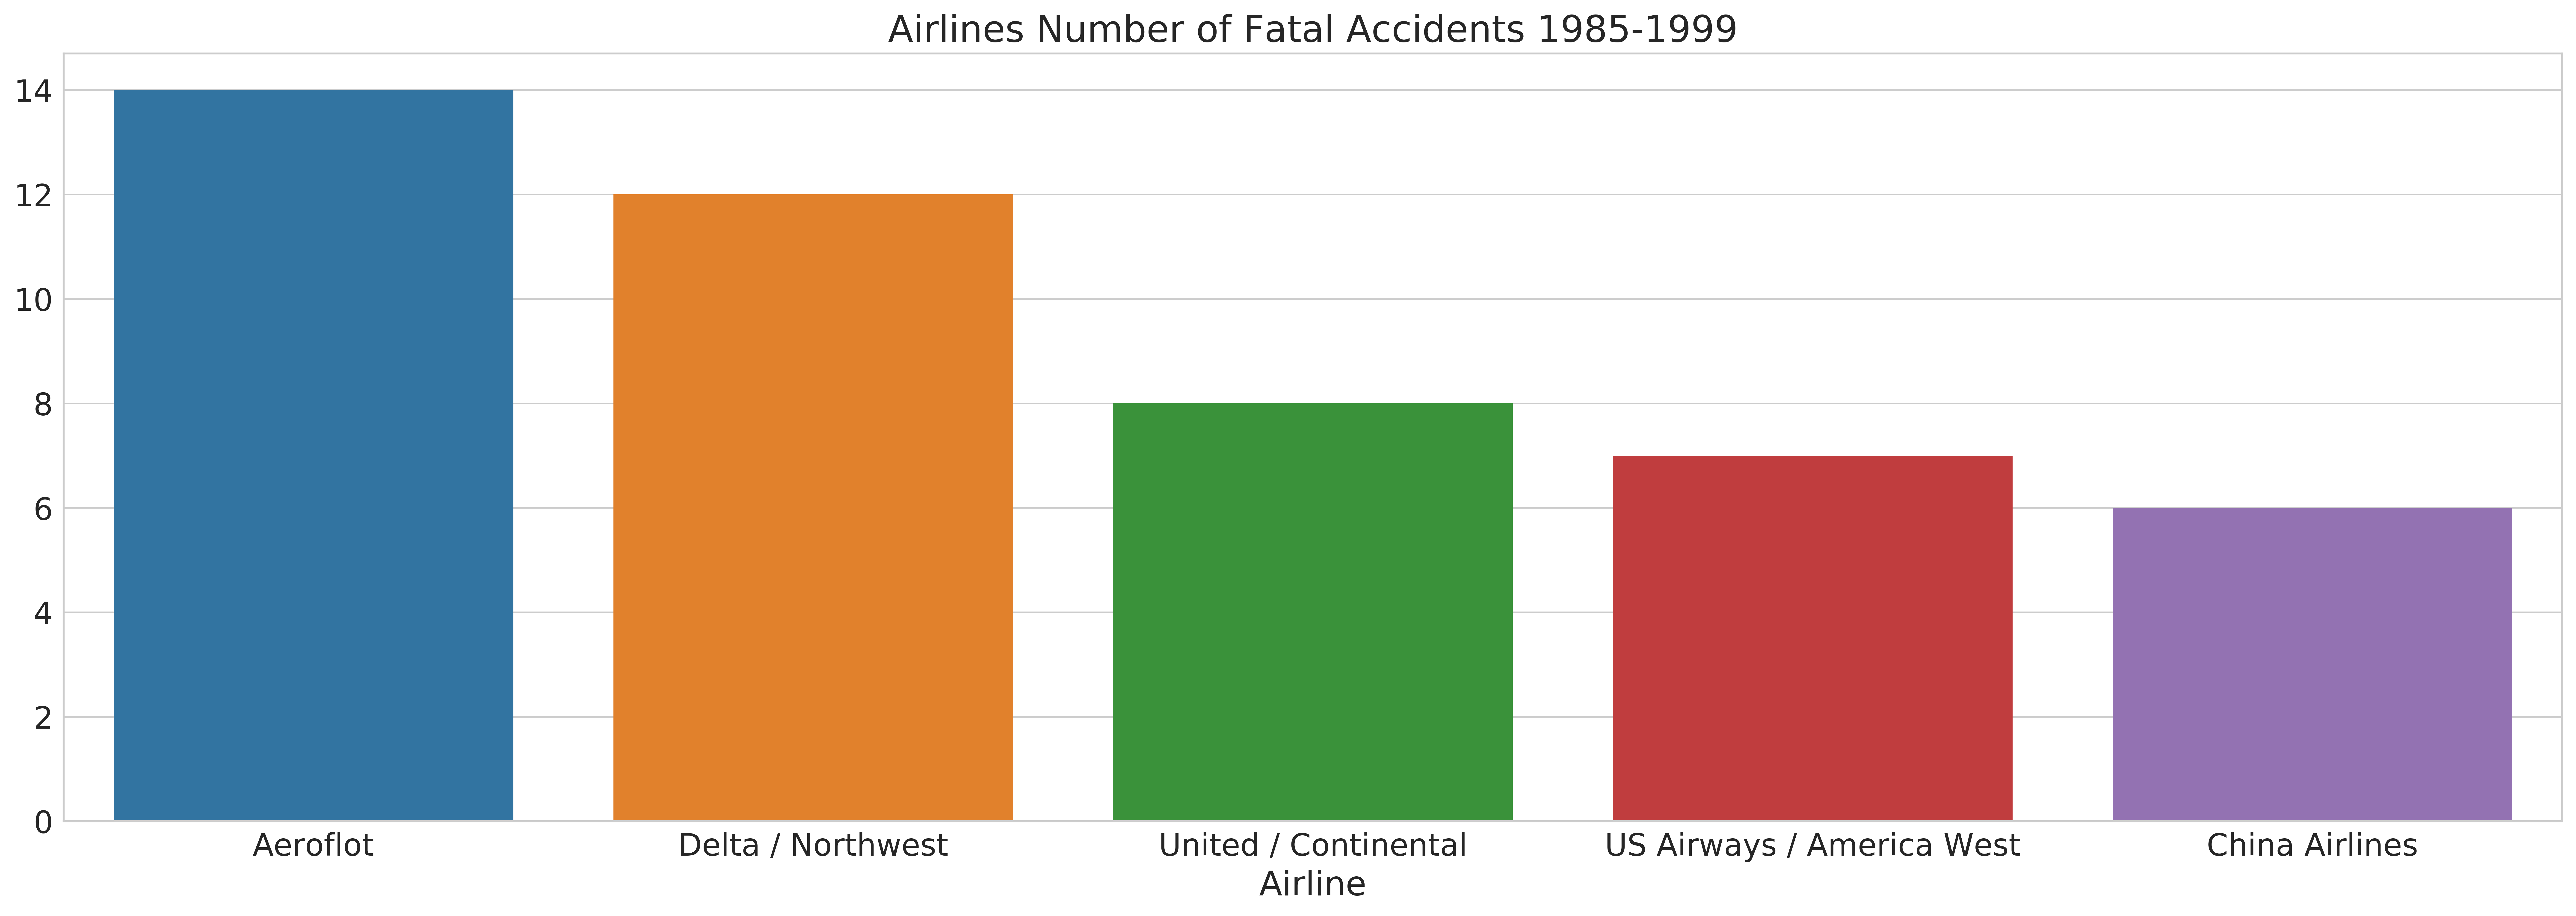

In [35]:
#Just assigning a copy of the values above to a variable
top5 = df['fatal_accidents_85_99'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatal Accidents 1985-1999'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatal Accidents 1985-1999', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatal Accidents 1985-1999')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalacc_85_99.png')

## 2000-2014

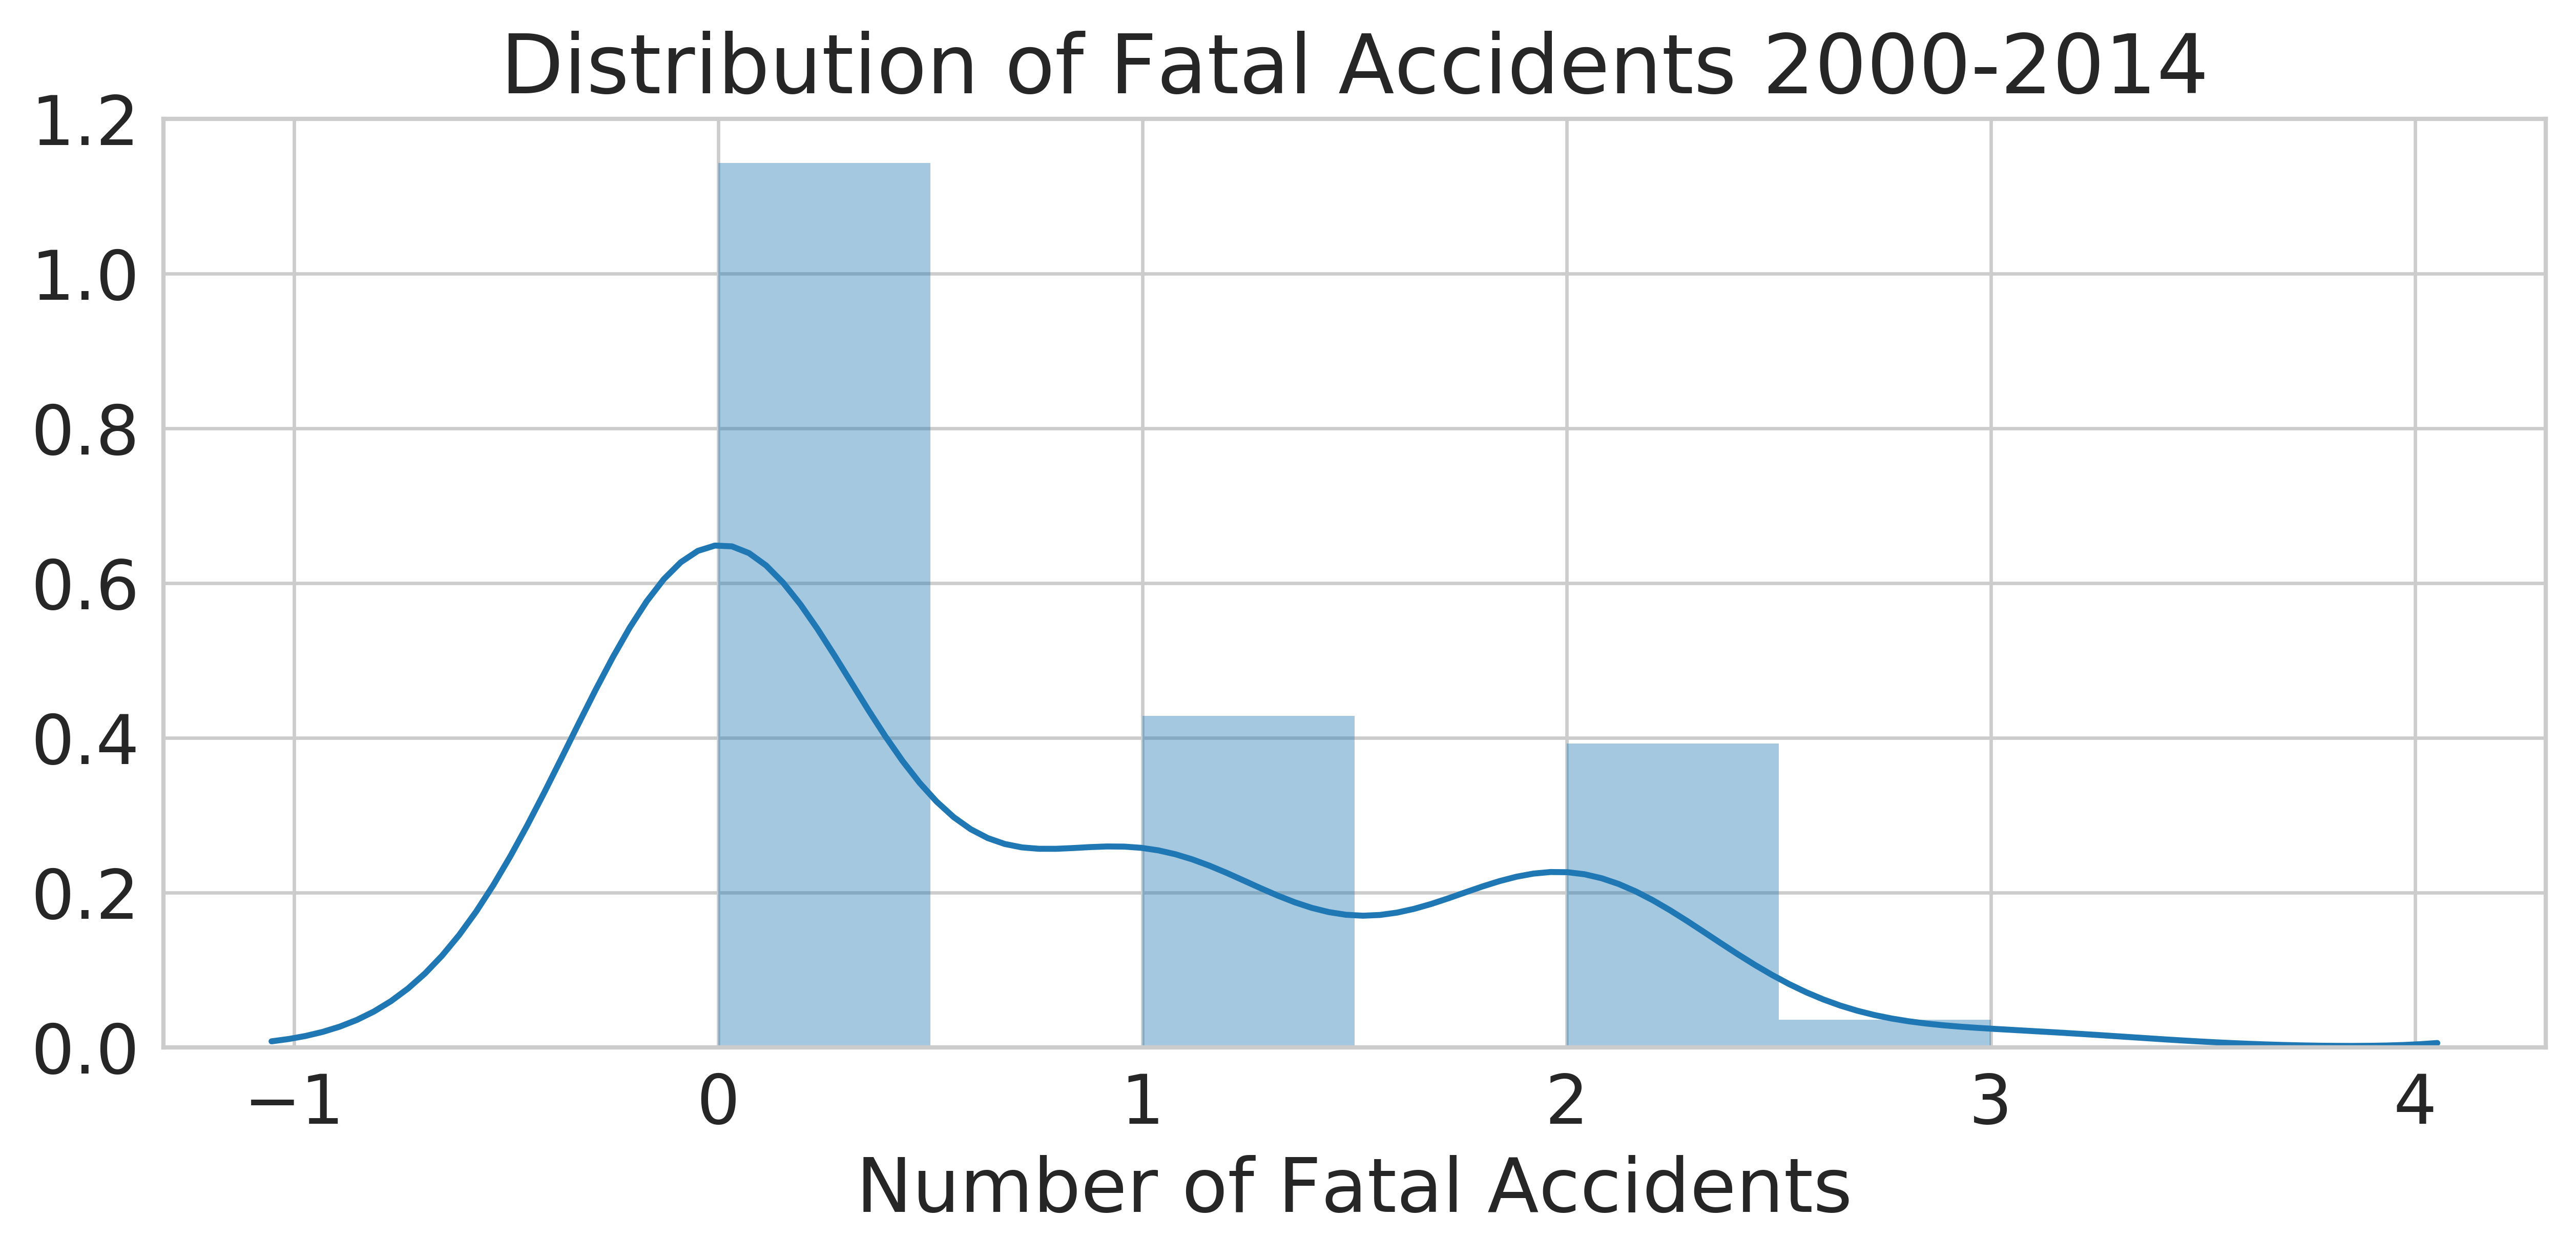

In [36]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatal Accidents 2000-2014')

#doing a distribution plot of the fatal accidents between 2000-2014
sns.distplot(df['fatal_accidents_00_14'])

plt.xlabel('Number of Fatal Accidents')

#saving the figure
plt.savefig('dist_fatalac_00_14.png')

It seems like things got a lot better. Let's check this out by seeing the total number of fatal accidents in 1985-1999 and 2000-2014:

In [37]:
df['fatal_accidents_85_99'].sum()

122

In [38]:
df['fatal_accidents_00_14'].sum()

37

Yes! Definitely things got better! 

### Let's see the 5 airlines with the most number of fatal accidents during 2000-2014


In [39]:
df['fatal_accidents_00_14'].sort_values(ascending=False).head(5)

airline
American*                     3
Kenya Airways                 2
US Airways / America West*    2
United / Continental*         2
Turkish Airlines              2
Name: fatal_accidents_00_14, dtype: int64

#### Same as before:

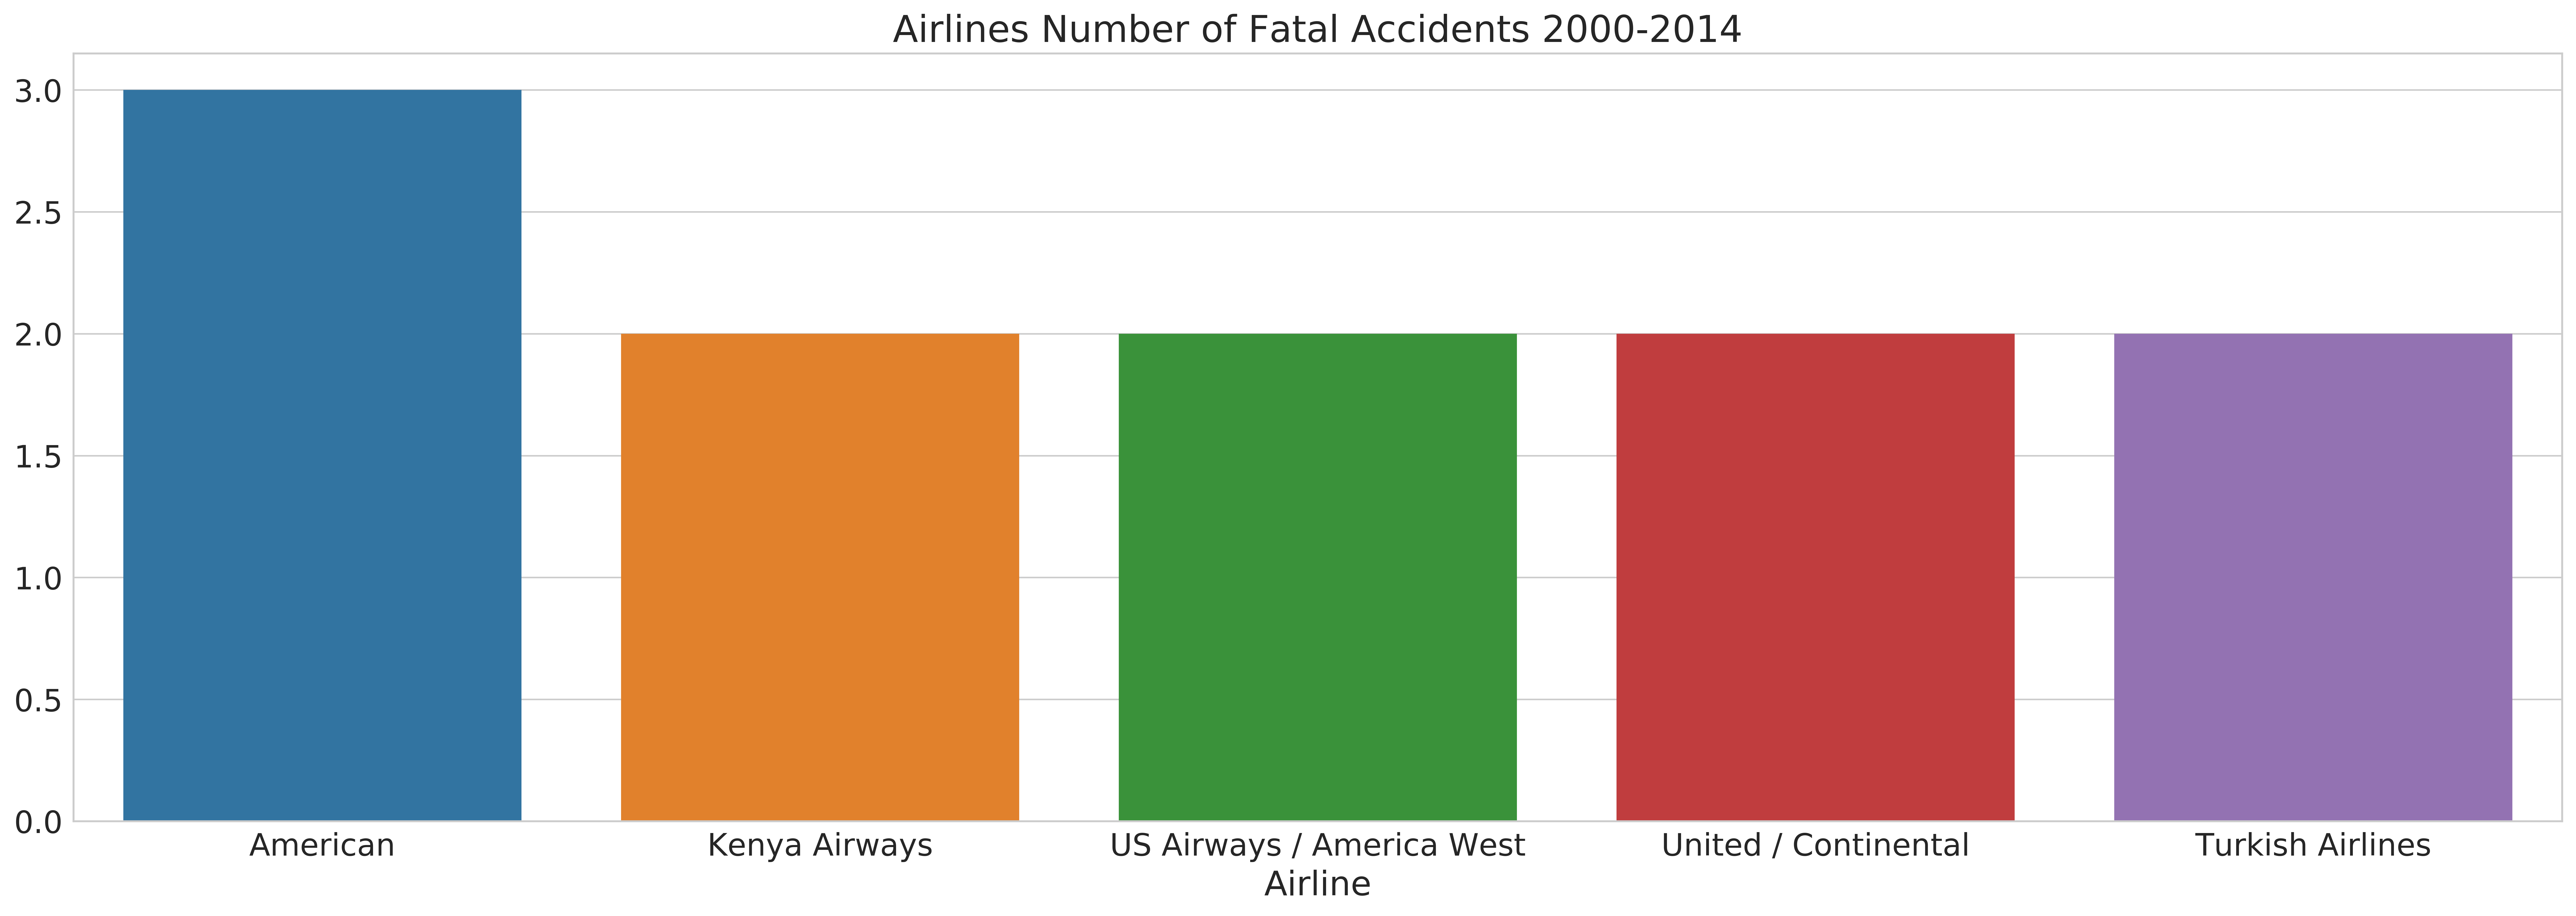

In [40]:
#Just assigning a copy of the values above to a variable
top5 = df['fatal_accidents_00_14'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatal Accidents 2000-2014'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatal Accidents 2000-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatal Accidents 2000-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalacc_00_14.png')

## All Time (1985-2014)

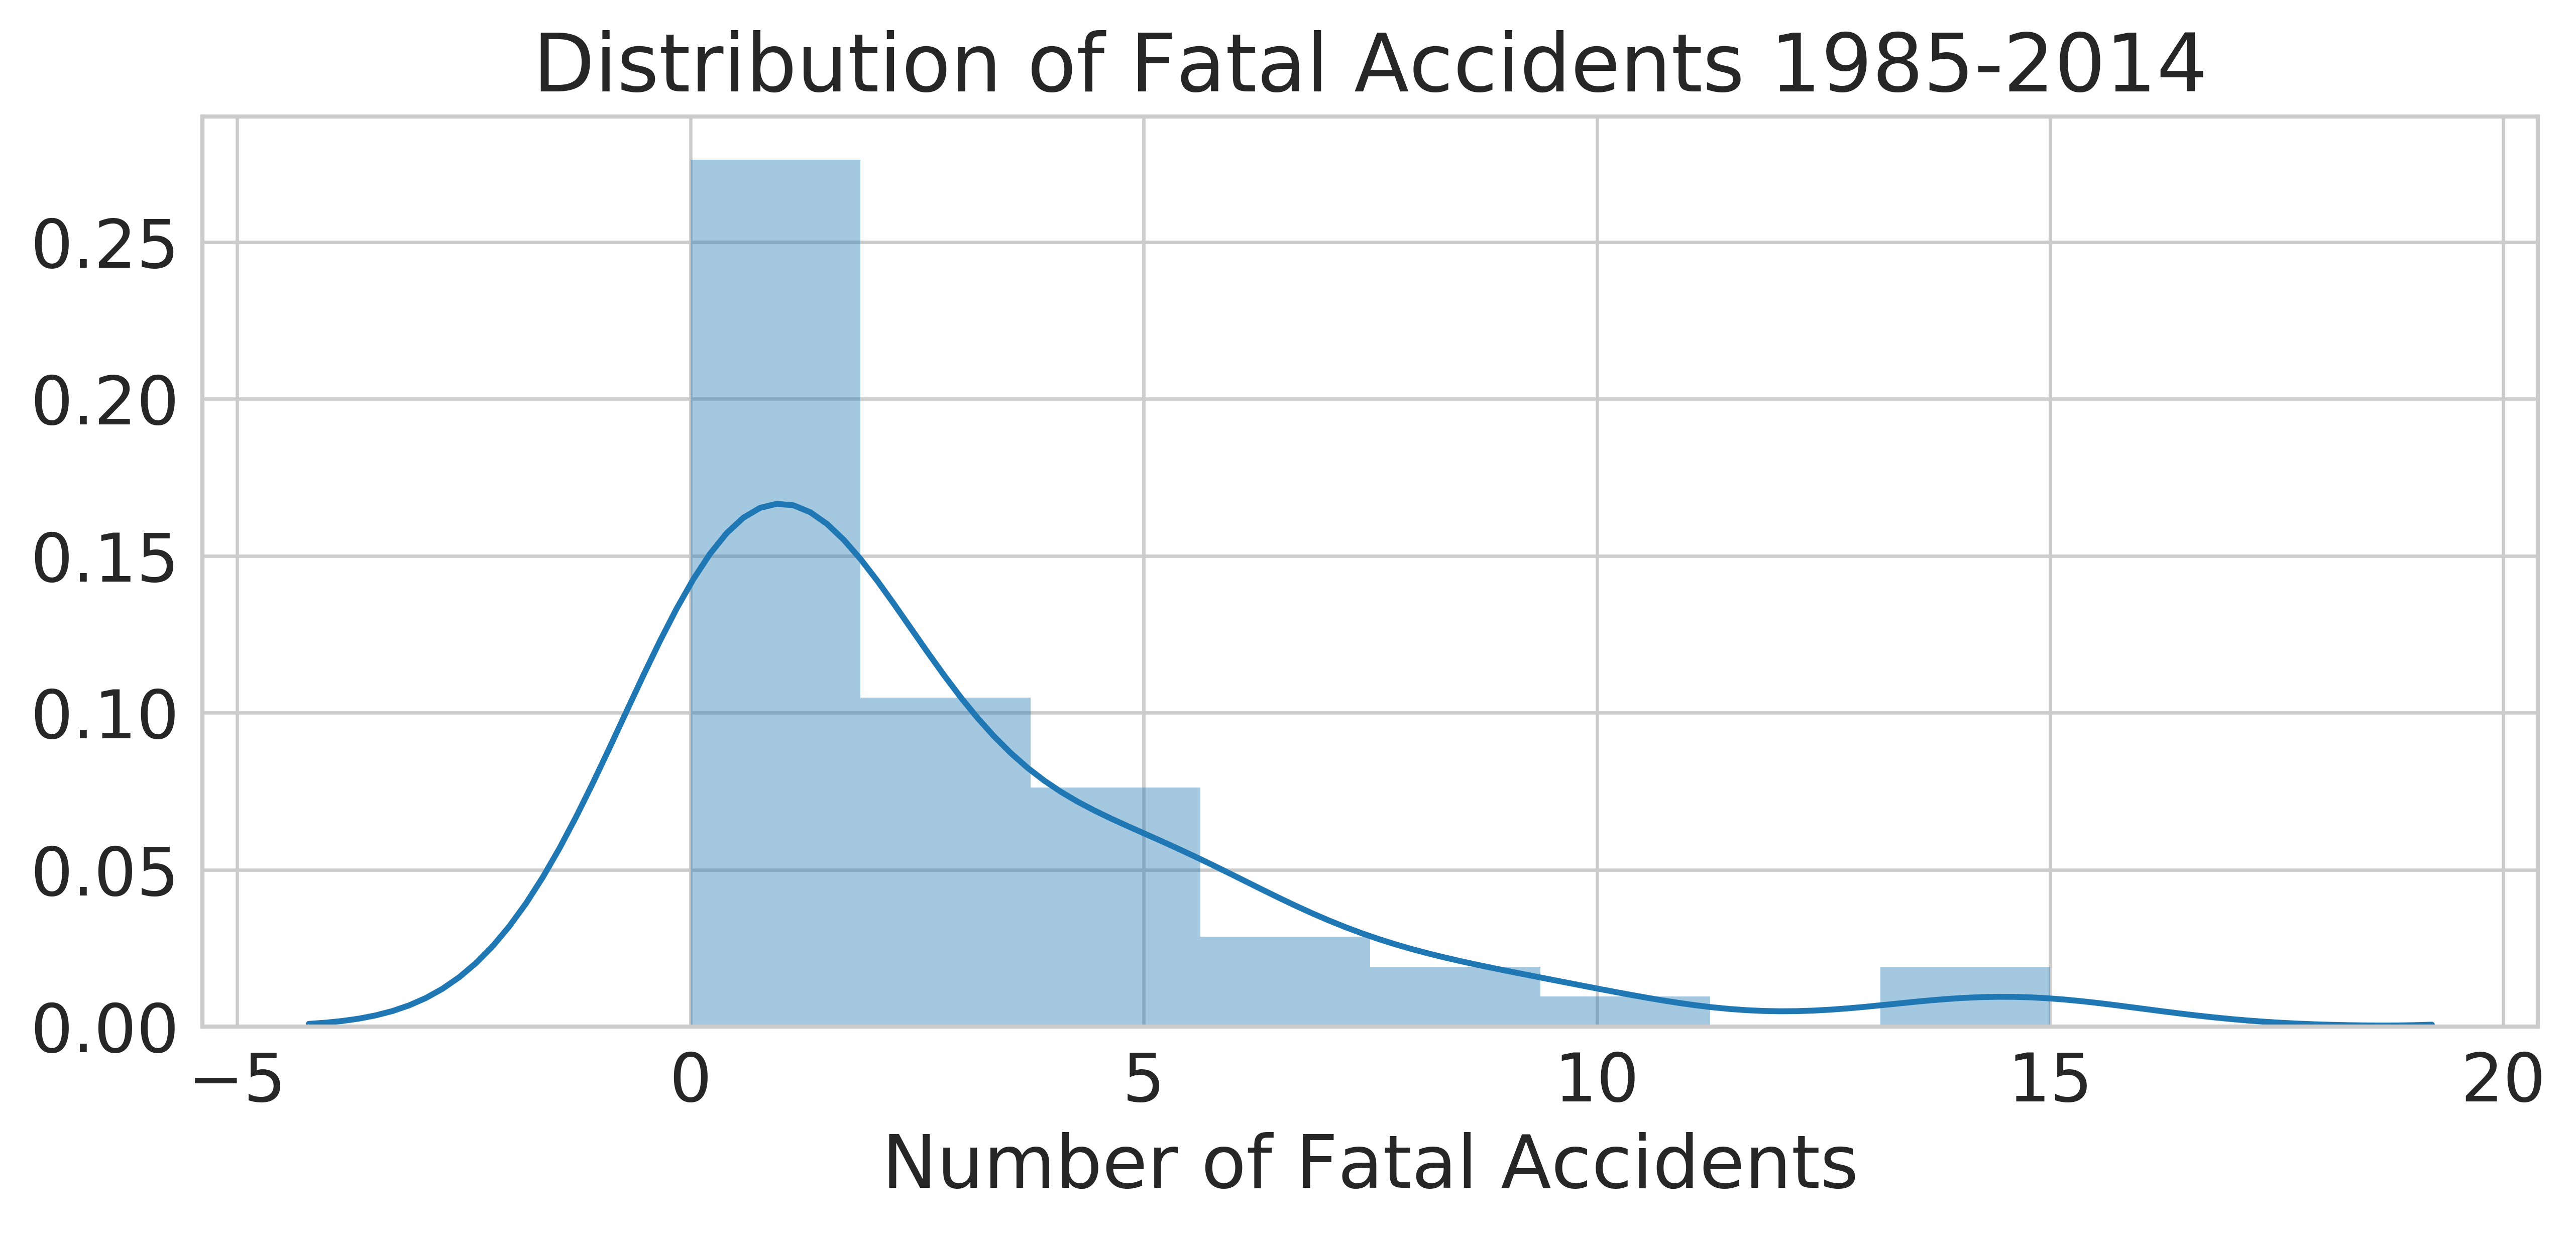

In [41]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatal Accidents 1985-2014')

#doing a distribution plot of the fatal accidents between 1985-2014
sns.distplot(df['total_fatal_accidents'])

plt.xlabel('Number of Fatal Accidents')

#saving the figure
plt.savefig('dist_fatalac_85_14.png')

### Checking the 5 airlines with the most number of fatal accidents during 1985-2014

In [42]:
df['total_fatal_accidents'].sort_values(ascending=False).head(5)

airline
Aeroflot*                     15
Delta / Northwest*            14
United / Continental*         10
US Airways / America West*     9
American*                      8
Name: total_fatal_accidents, dtype: int64

#### Same as before:

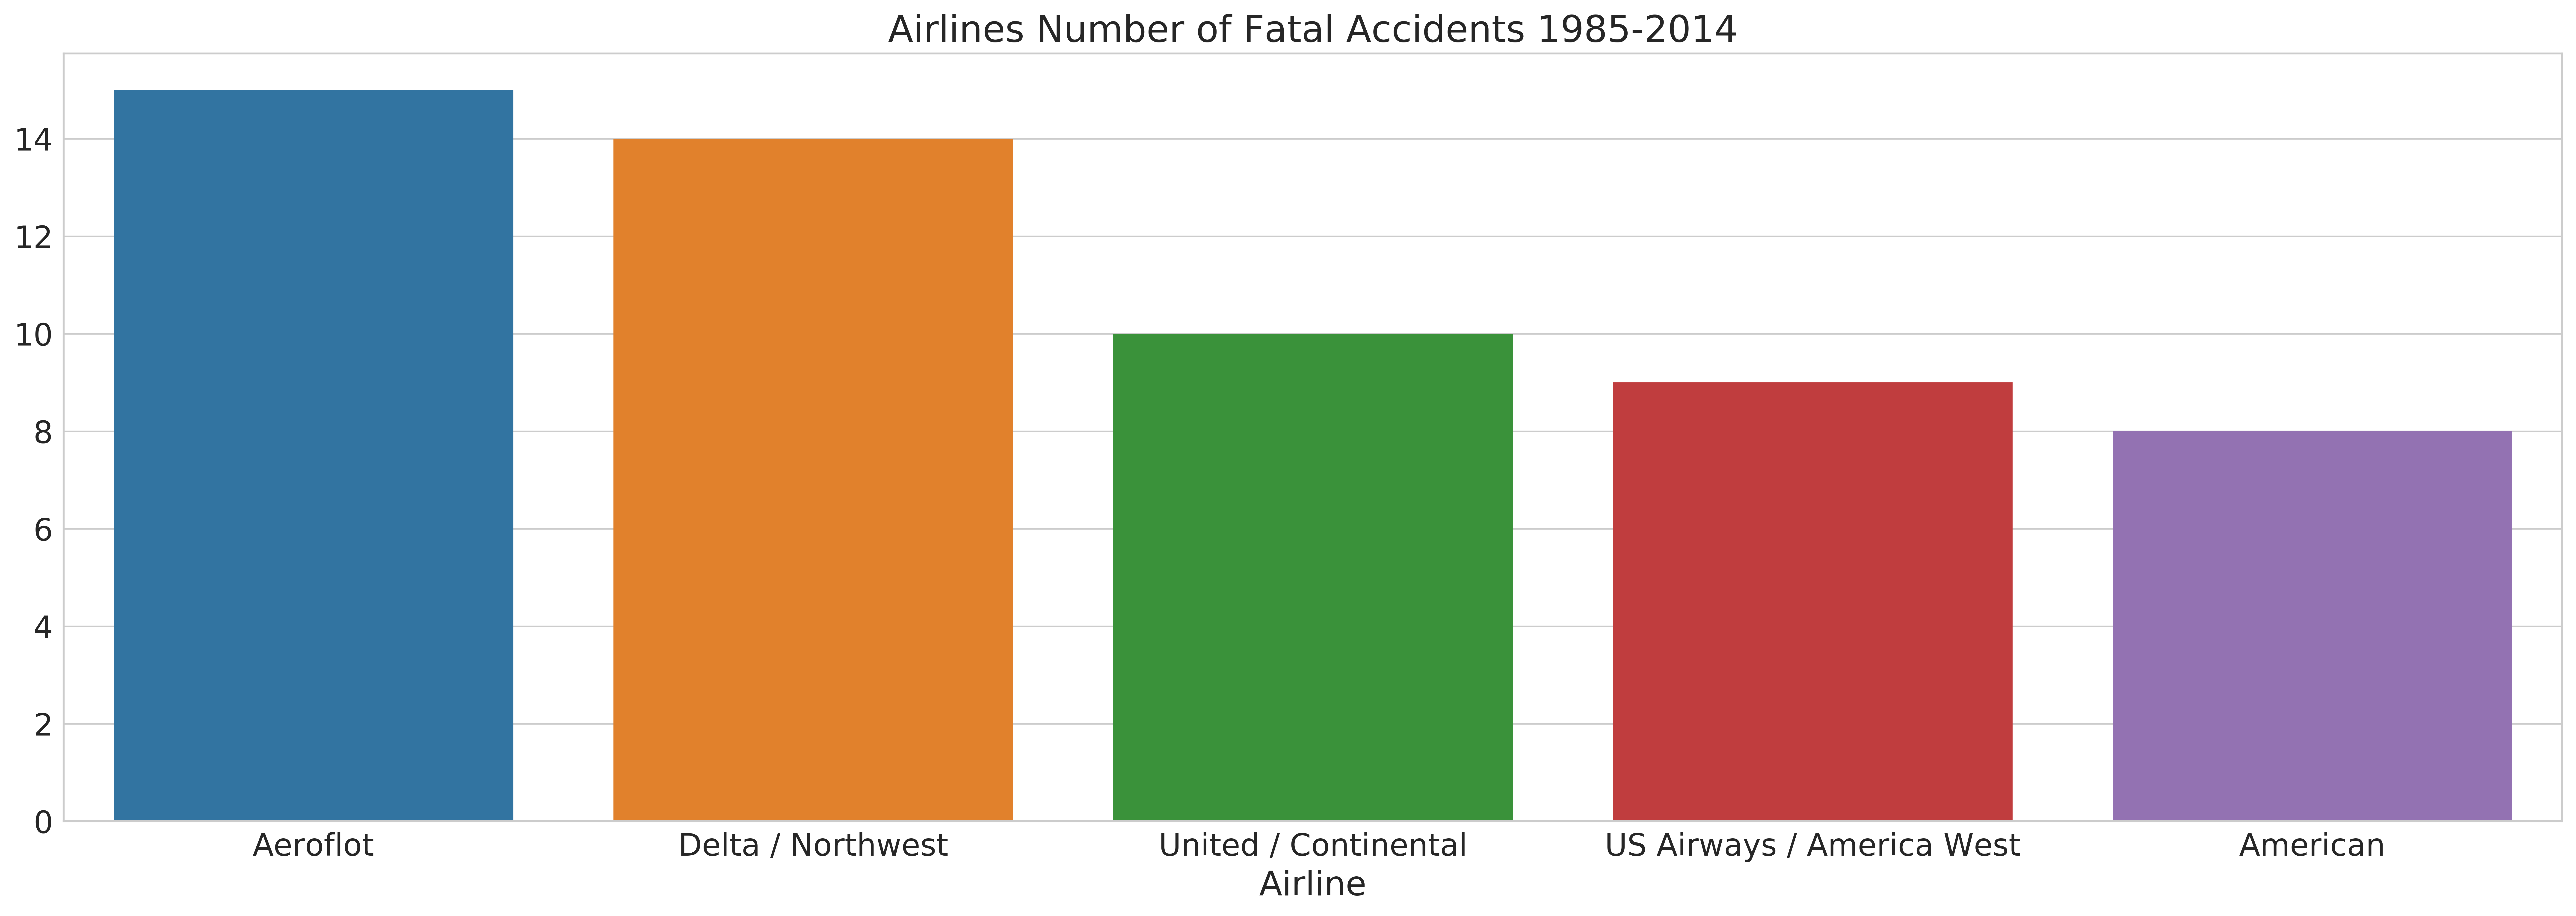

In [43]:
#Just assigning a copy of the values above to a variable
top5 = df['total_fatal_accidents'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatal Accidents 1985-2014'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatal Accidents 1985-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatal Accidents 1985-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalacc_85_14.png')

# Analyzing Fatalities

This could lead to interesting facts about some accidents.

## 1985-1999

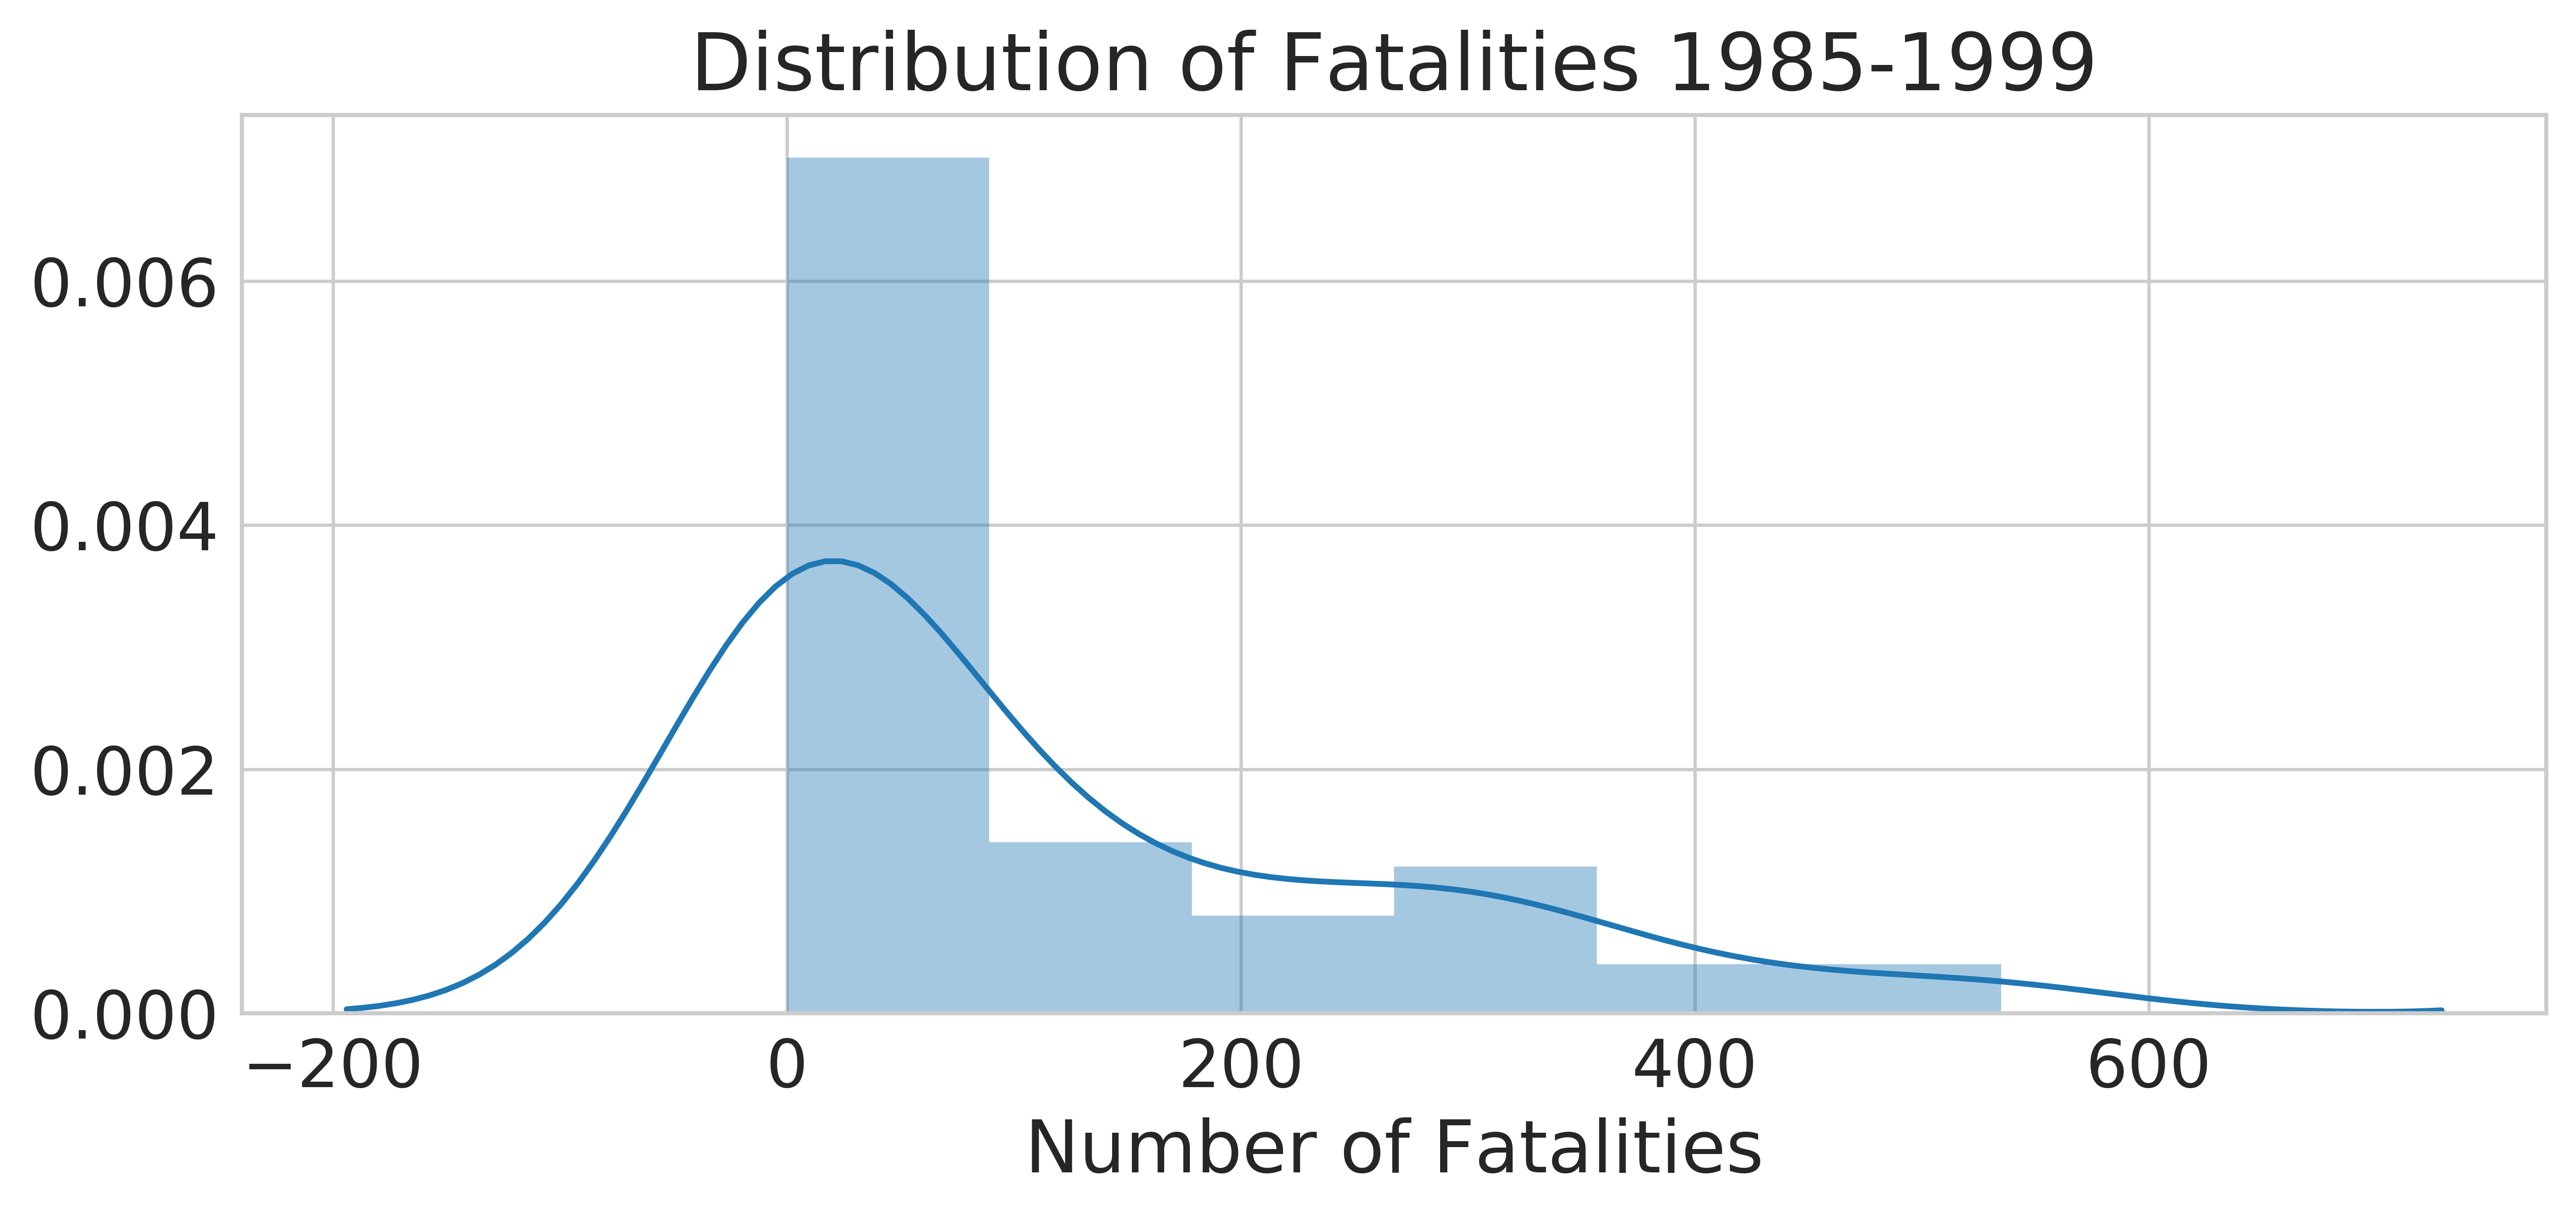

In [44]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatalities 1985-1999')

#doing a distribution plot of the fatalities between 1985-1999
sns.distplot(df['fatalities_85_99'])

plt.xlabel('Number of Fatalities')

#saving the figure
plt.savefig('dist_fatalities_85_99.png')

### 5 Airlines with the most fatalities 1985-1999

In [45]:
df['fatalities_85_99'].sort_values(ascending=False).head(5)

airline
China Airlines        535
Japan Airlines        520
Korean Air            425
Delta / Northwest*    407
Air India*            329
Name: fatalities_85_99, dtype: int64

#### Same as before:

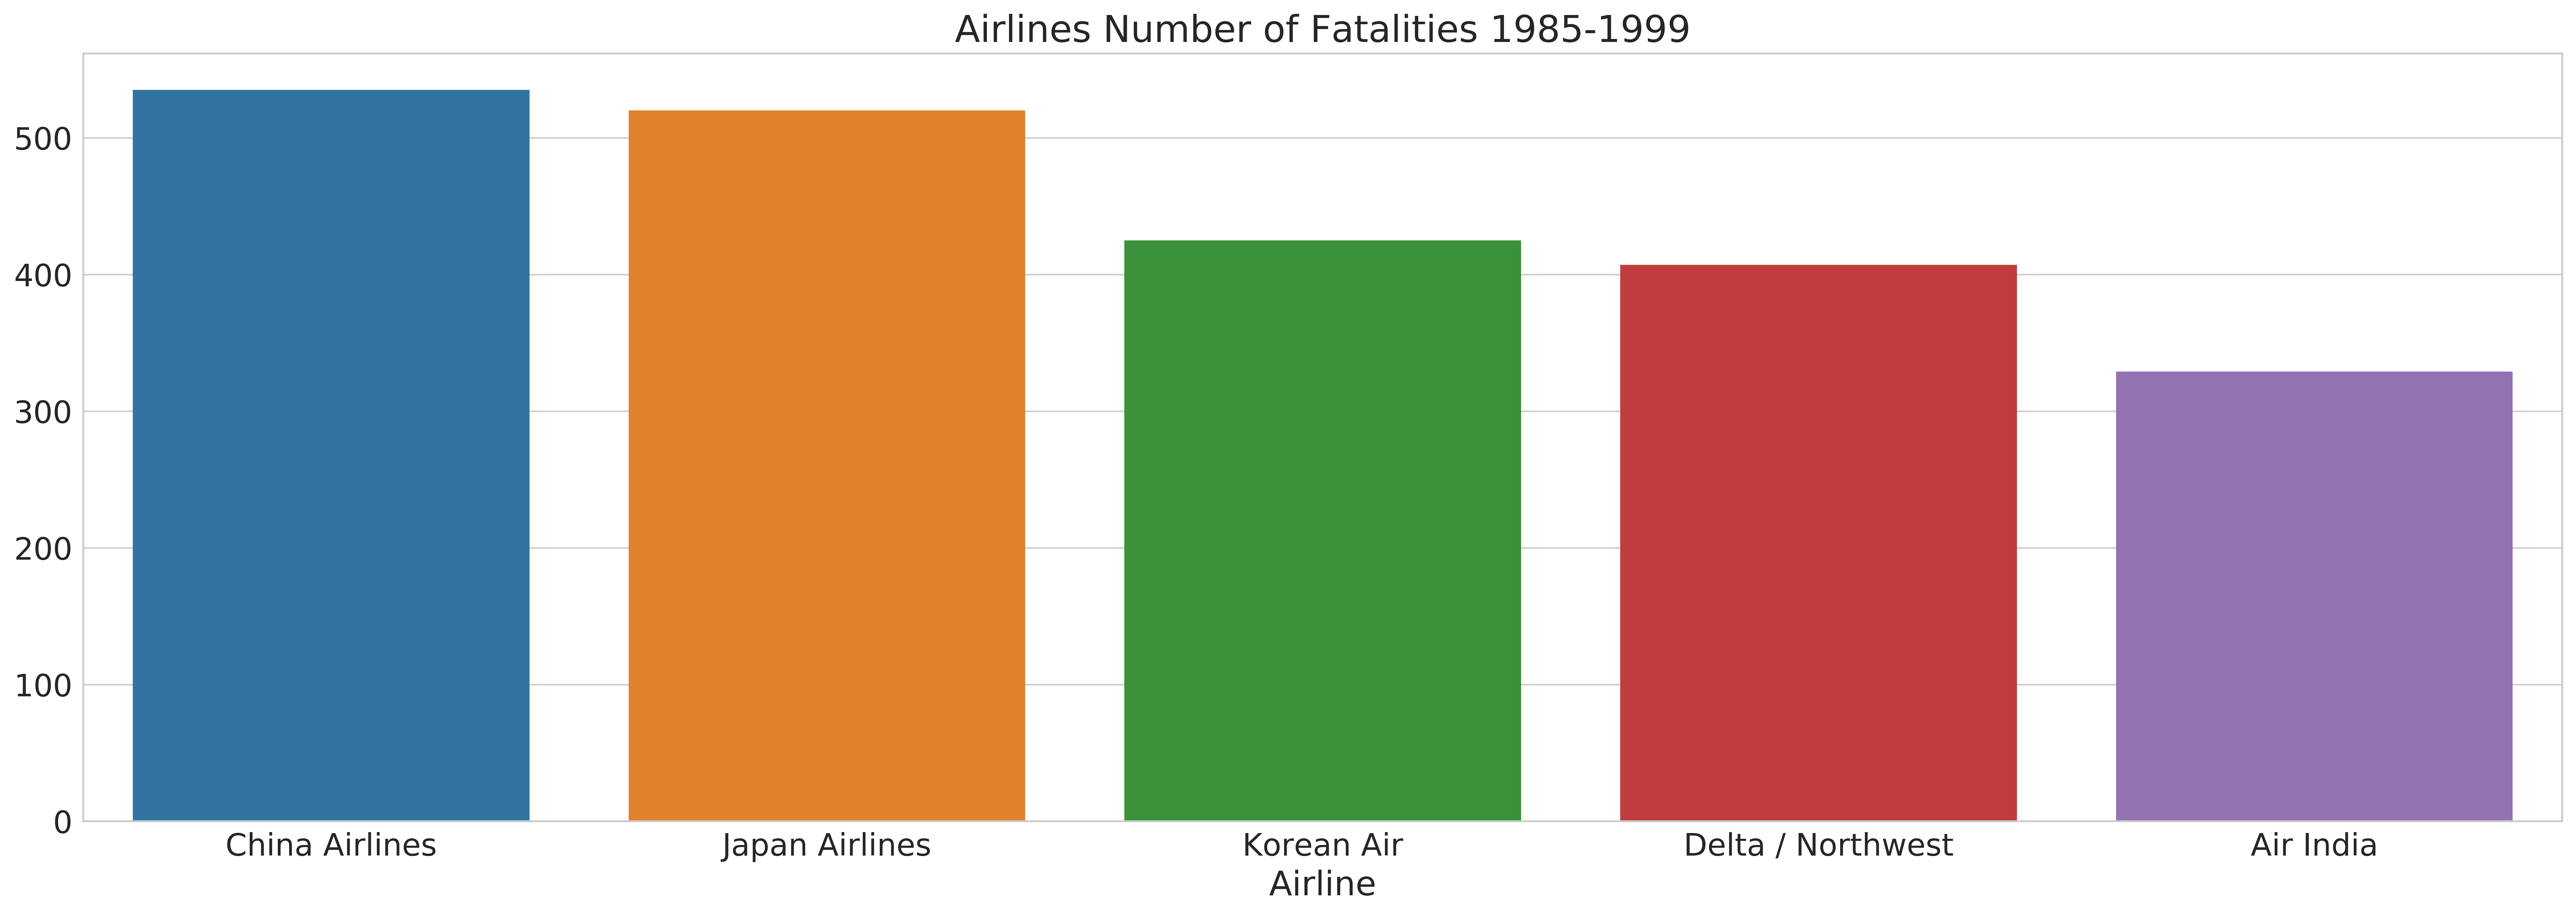

In [46]:
#Just assigning a copy of the values above to a variable
top5 = df['fatalities_85_99'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatalities 1985-1999'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatalities 1985-1999', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatalities 1985-1999')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalities_85_99.png')

## 2000-2014

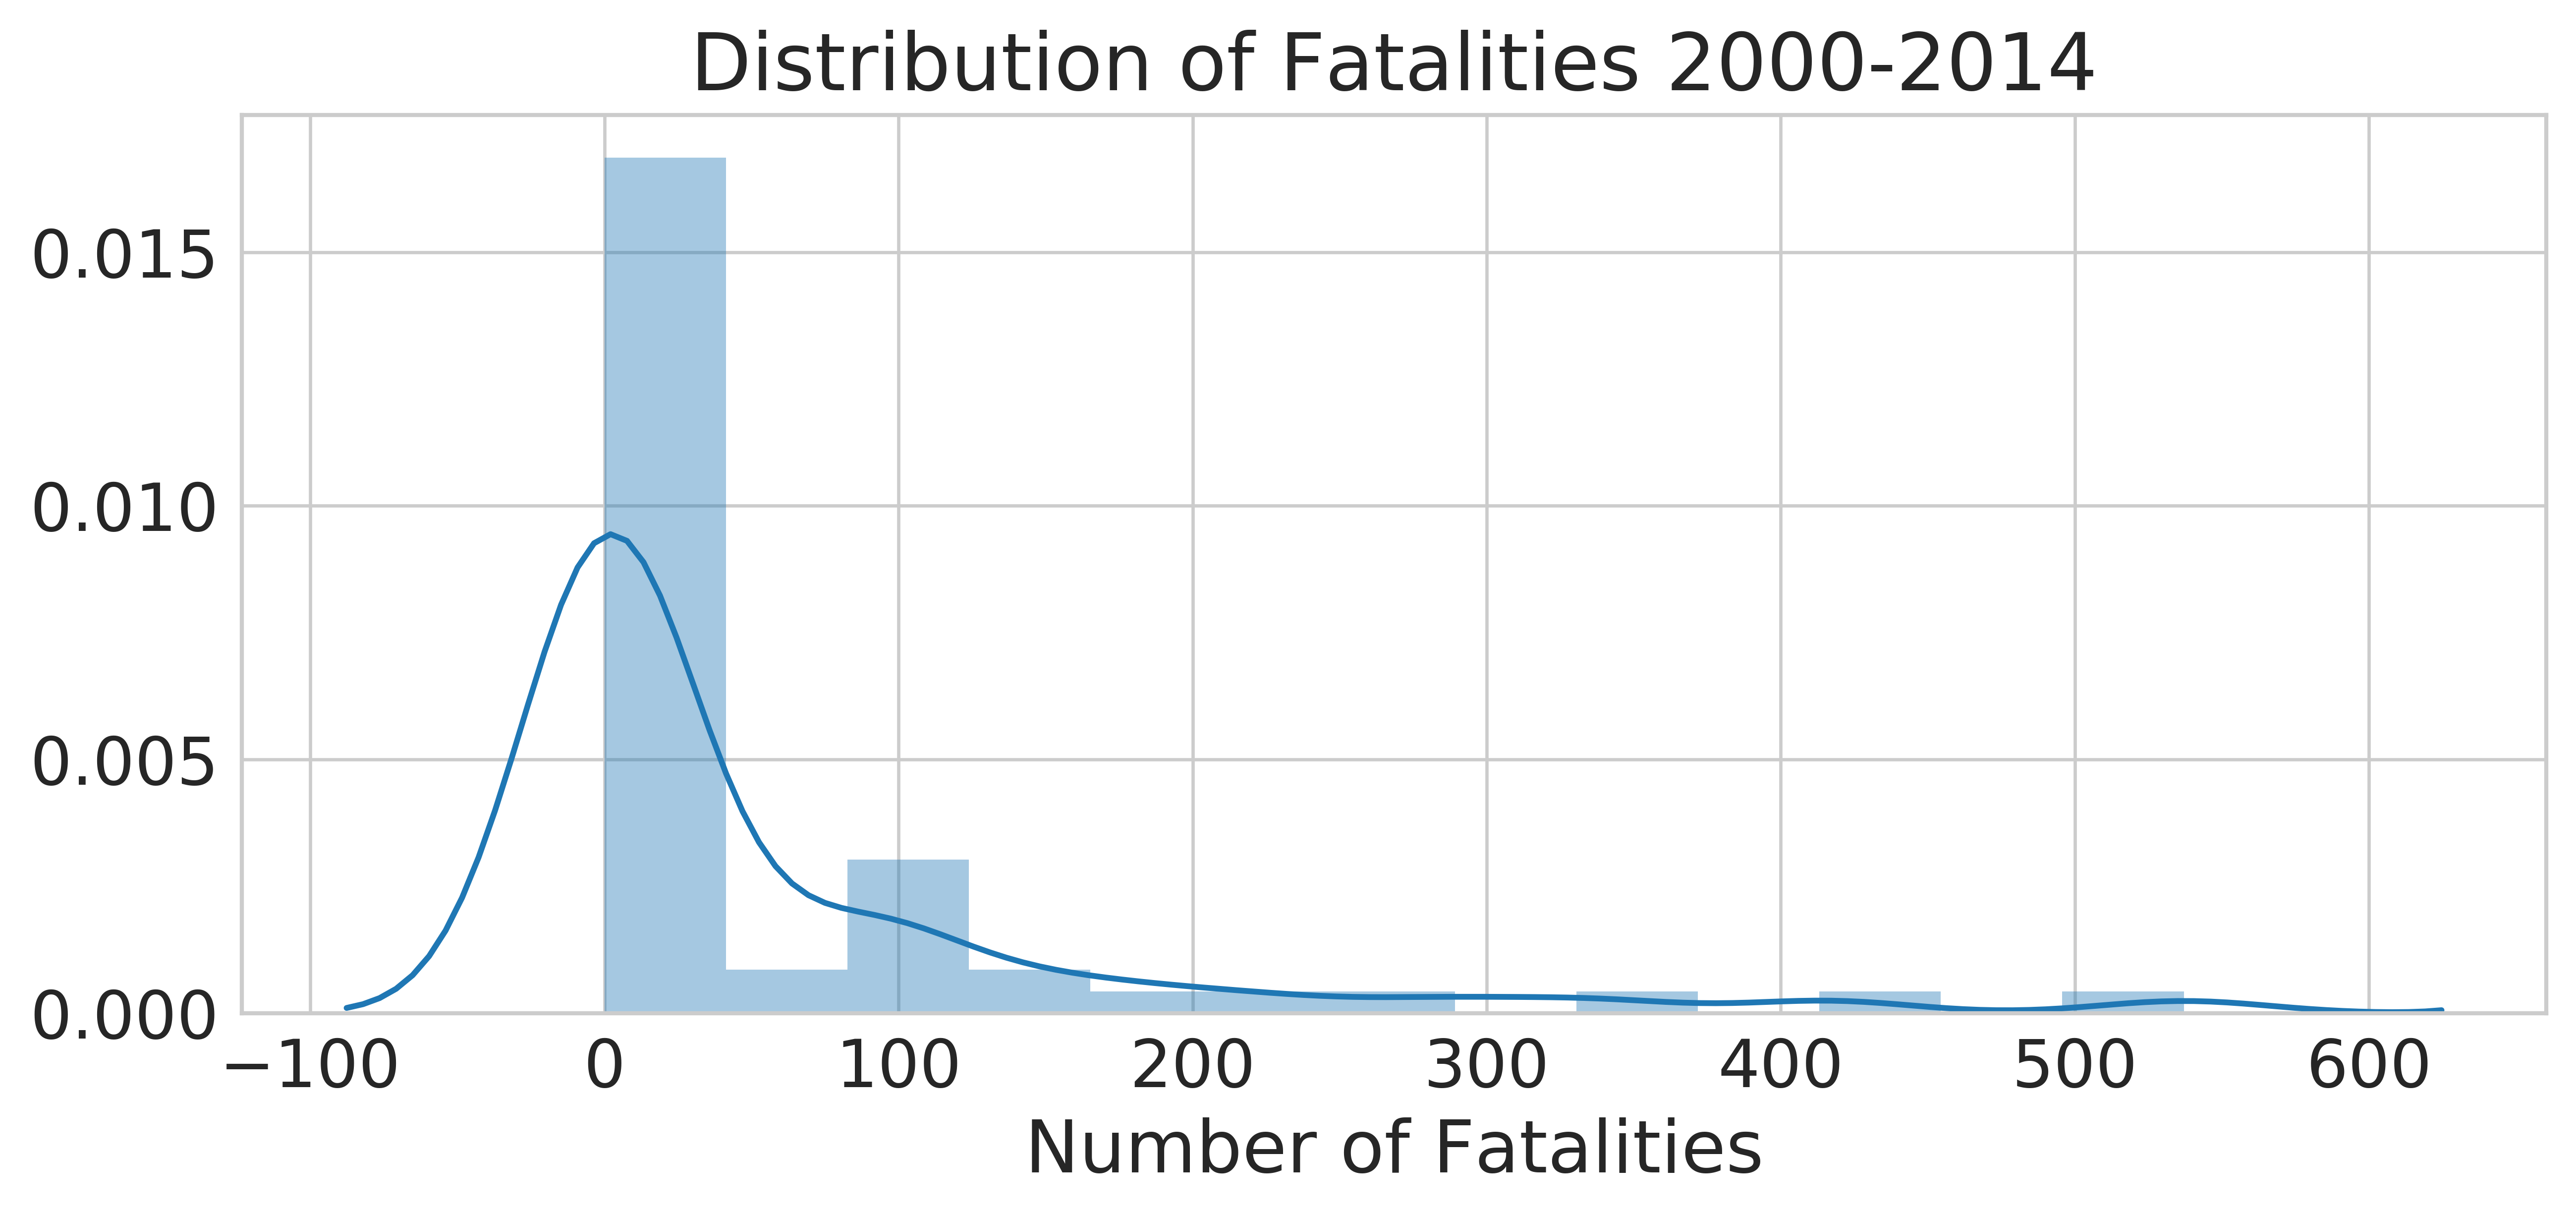

In [47]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatalities 2000-2014')

#doing a distribution plot of the fatalities between 2000-2014
sns.distplot(df['fatalities_00_14'])

plt.xlabel('Number of Fatalities')

#saving the figure
plt.savefig('dist_fatalities_00_14.png')

### 5 Airlines with the most fatalities 2000-2014

In [48]:
df['fatalities_00_14'].sort_values(ascending=False).head(5)

airline
Malaysia Airlines    537
American*            416
Air France           337
Kenya Airways        283
China Airlines       225
Name: fatalities_00_14, dtype: int64

#### Same as before:

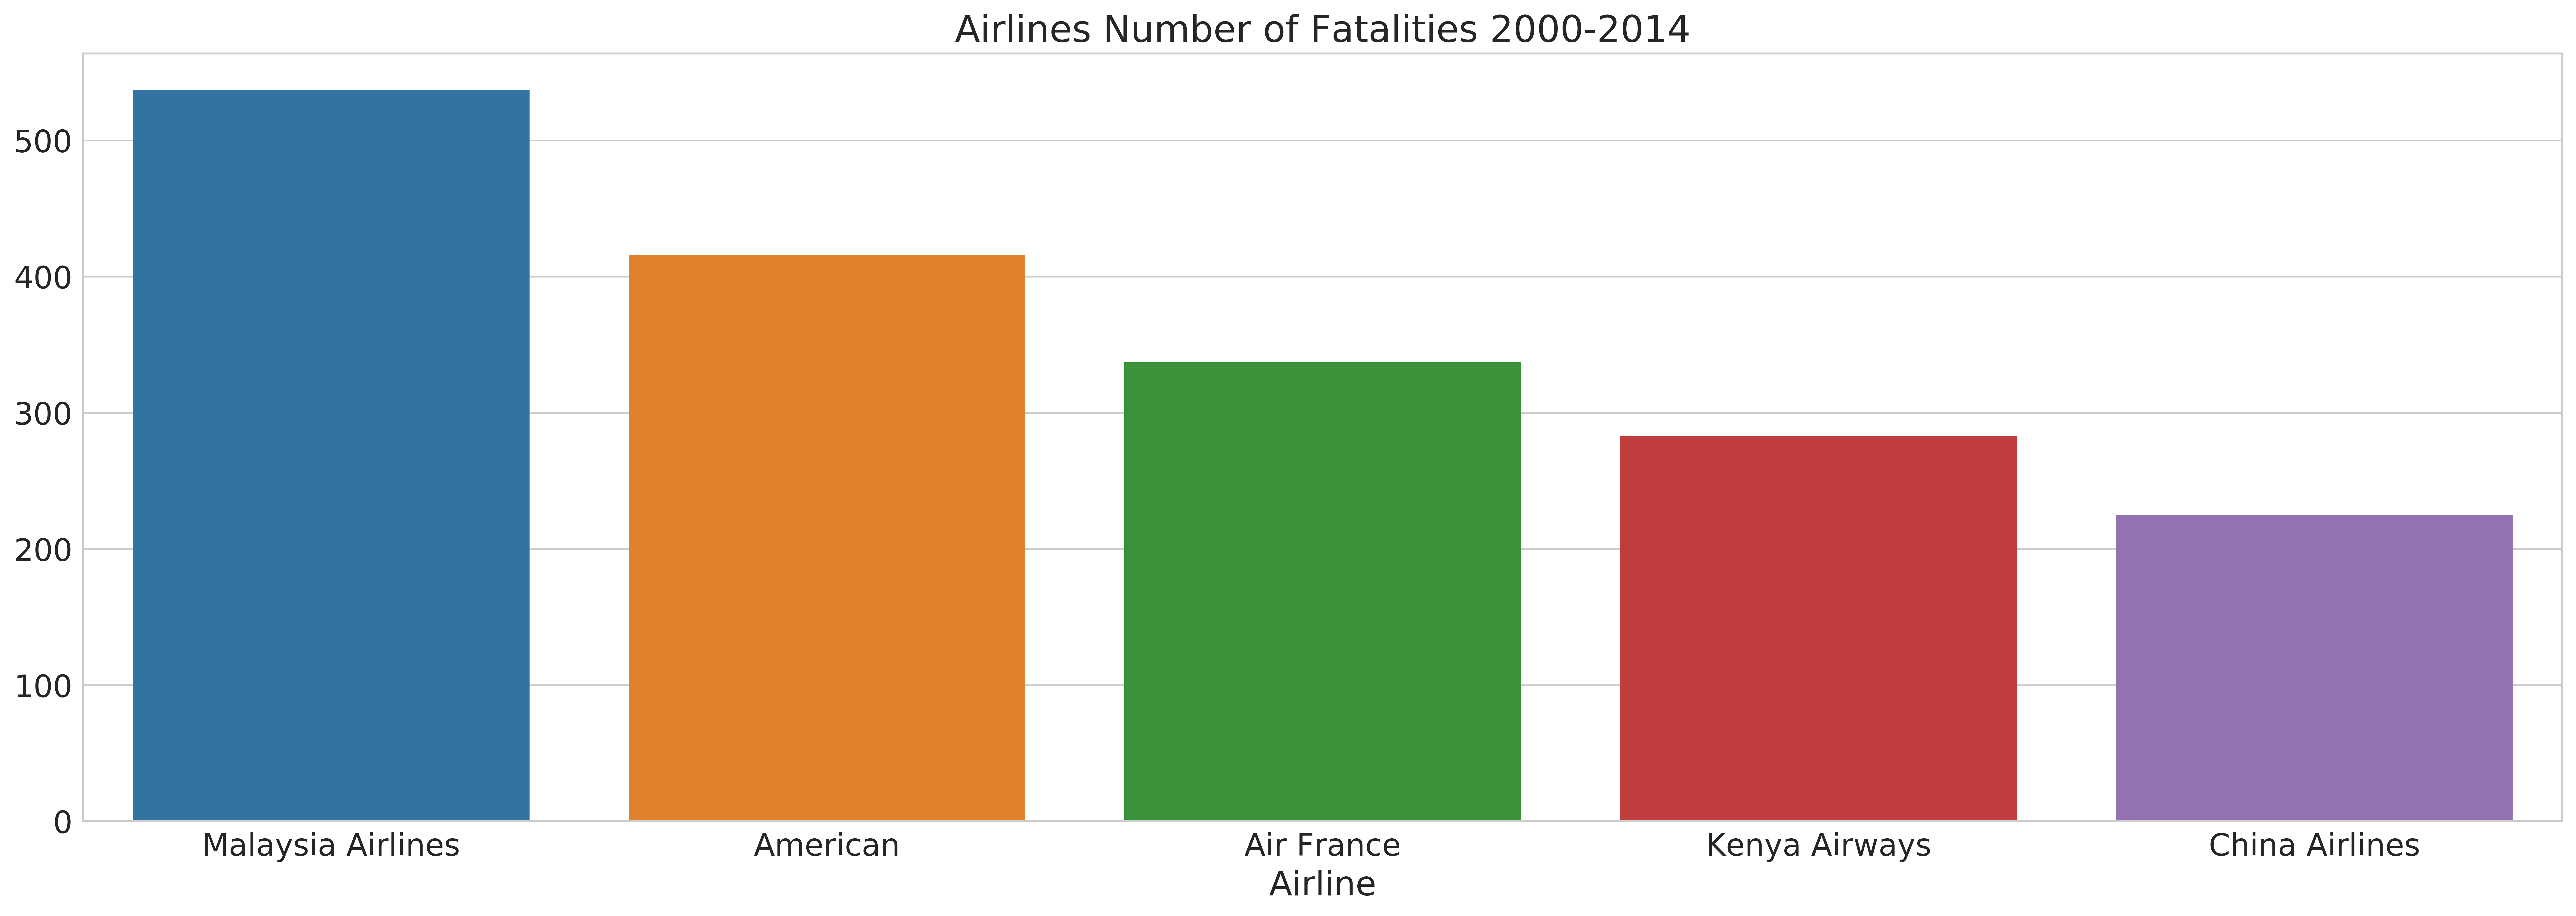

In [49]:
#Just assigning a copy of the values above to a variable
top5 = df['fatalities_00_14'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatalities 2000-2014'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatalities 2000-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatalities 2000-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalities_00_14.png')

## All time (1985-2014)

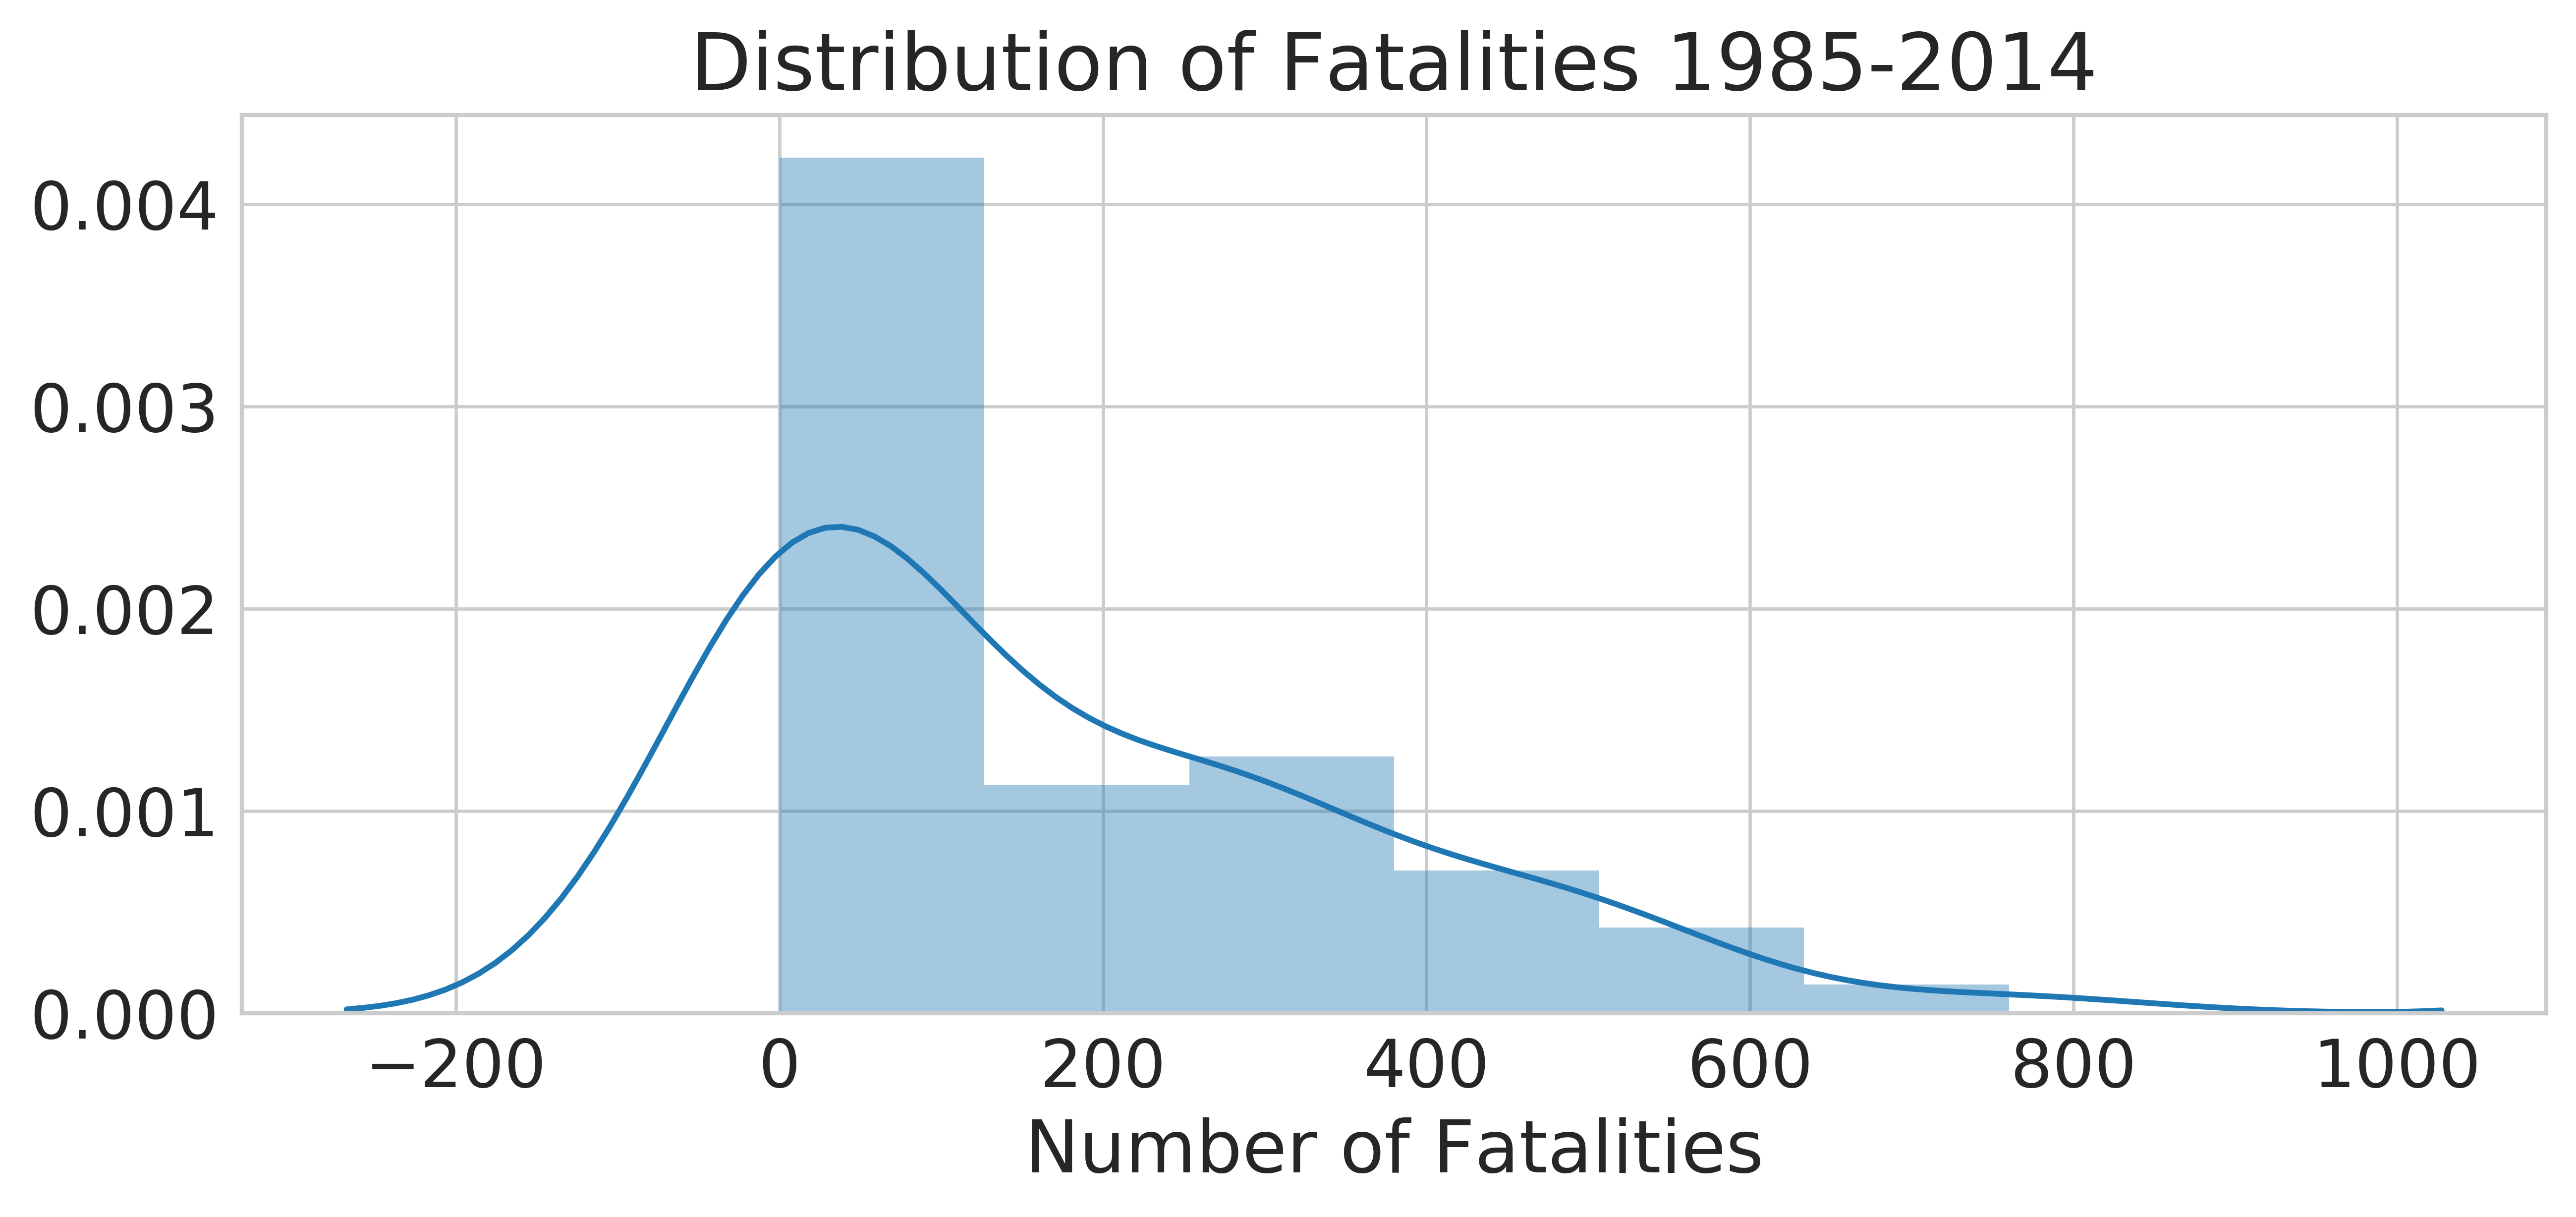

In [50]:
plt.figure(figsize=(10,4),dpi=600)
plt.title('Distribution of Fatalities 1985-2014')

#doing a distribution plot of the fatalities between 1985-2014
sns.distplot(df['total_fatalities'])

plt.xlabel('Number of Fatalities')

#saving the figure
plt.savefig('dist_fatalities_85_14.png')

### 5 Airlines with the most fatalities 1985-2014

In [51]:
df['total_fatalities'].sort_values(ascending=False).head(5)

airline
China Airlines       760
Malaysia Airlines    571
Japan Airlines       520
American*            517
Air India*           487
Name: total_fatalities, dtype: int64

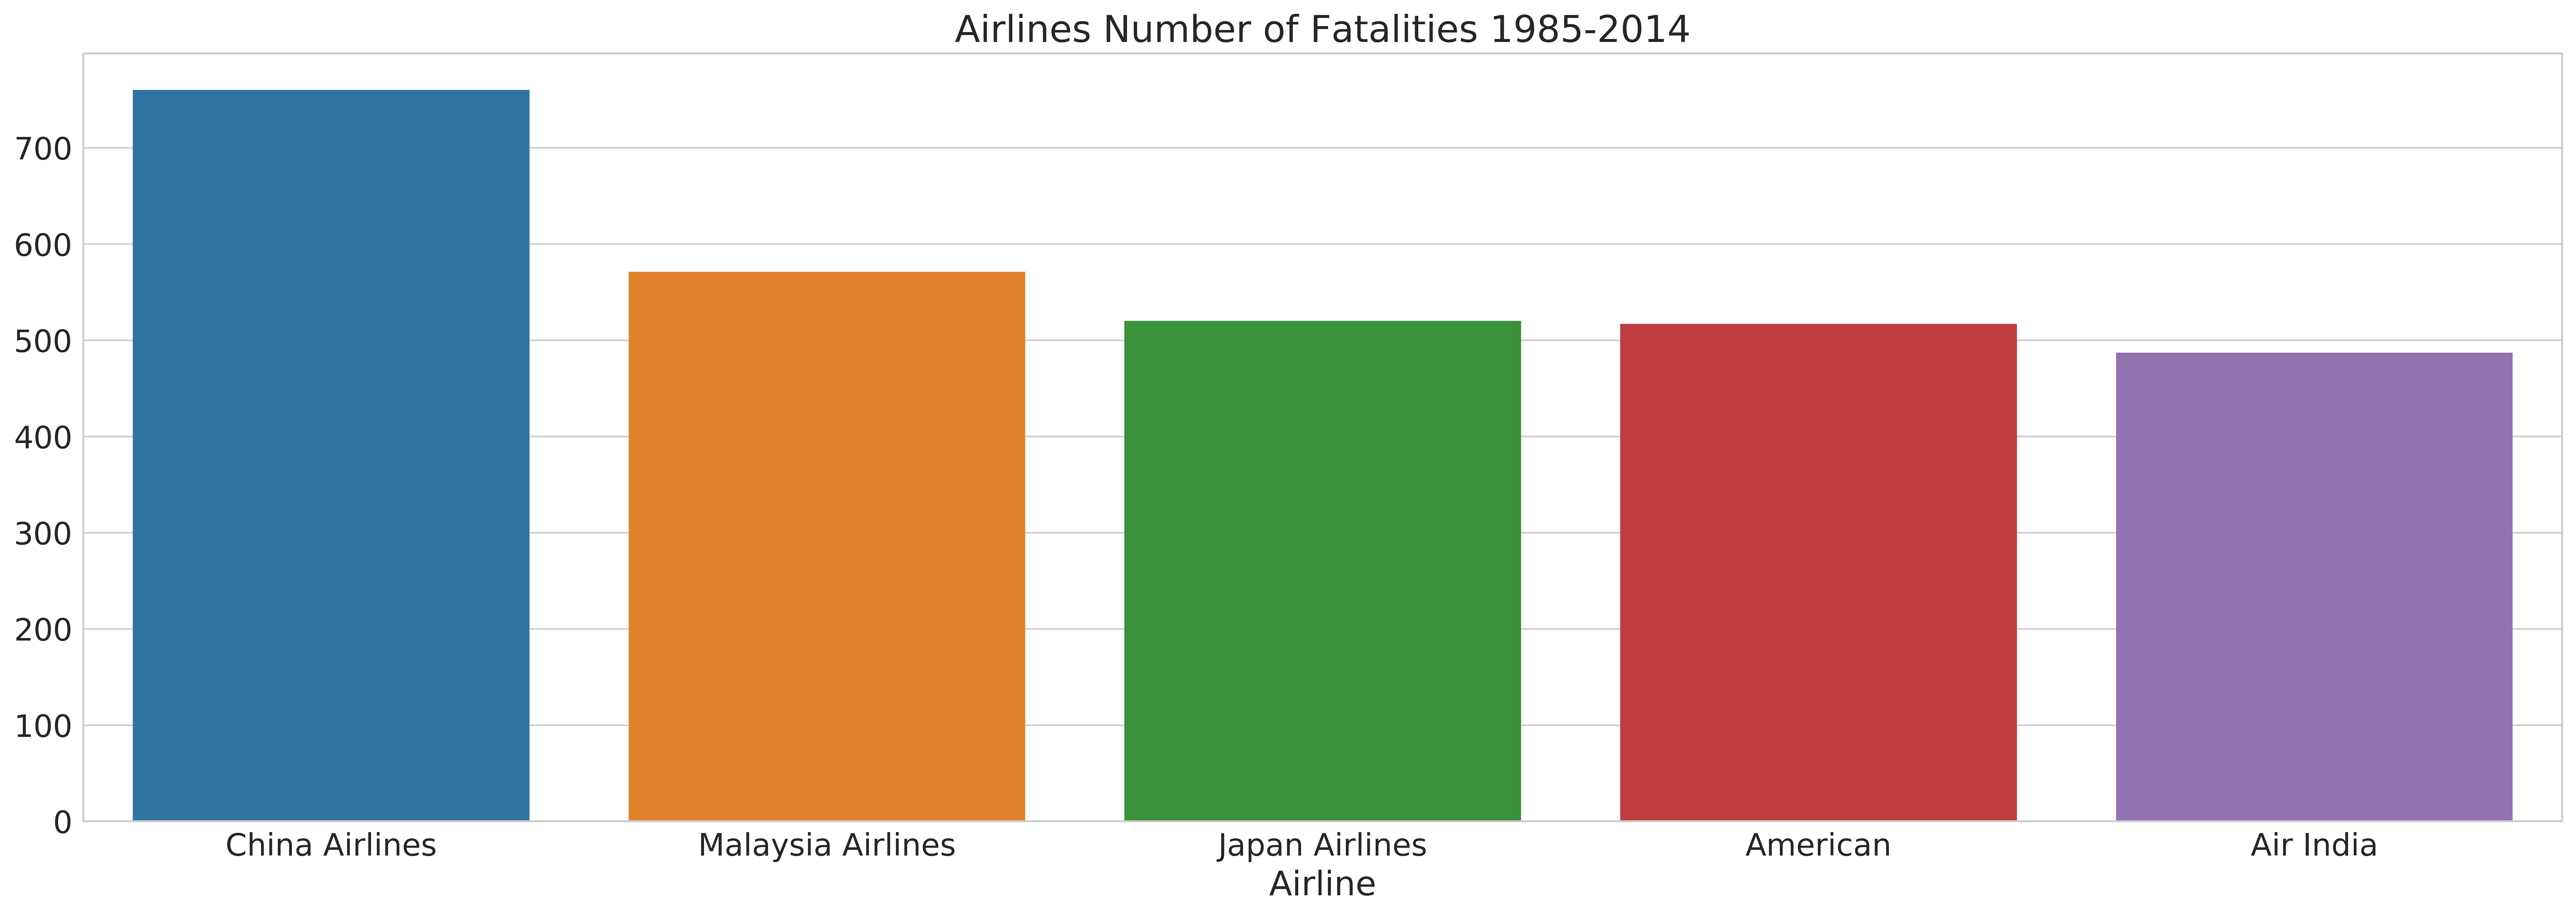

In [52]:
#Just assigning a copy of the values above to a variable
top5 = df['total_fatalities'].sort_values(ascending=False).head(5).copy()

#creating a dataframe(the nice looking tabular data below) out of it 
top5_df = pd.DataFrame(top5.values, top5.index, ['Number of Fatalities 1985-2014'])

#resetting index like before
top5_df.reset_index(inplace=True)

#just like before, removing asterisks
top5_df['airline'] = top5_df['airline'].apply(lambda x: x.replace('*', ''))

#Now to the plot itself

plt.figure(figsize=(19,7),dpi=600)

sns.barplot(x='airline', y='Number of Fatalities 1985-2014', data=top5_df)

plt.xlabel('Airline')
plt.ylabel('')

plt.title('Airlines Number of Fatalities 1985-2014')

#adjusting layout to fit better
plt.tight_layout()

#saving figure
plt.savefig('top_nfatalities_85_14.png')

# Let's compare the fatalities a bit.

In [53]:
#total
df['total_fatalities'].sort_values(ascending=False).head(10)

airline
China Airlines           760
Malaysia Airlines        571
Japan Airlines           520
American*                517
Air India*               487
Delta / Northwest*       458
United / Continental*    428
Korean Air               425
Air France               416
Avianca                  323
Name: total_fatalities, dtype: int64

In [54]:
#1985-1999
df['fatalities_85_99'].sort_values(ascending=False).head(10)

airline
China Airlines           535
Japan Airlines           520
Korean Air               425
Delta / Northwest*       407
Air India*               329
Avianca                  323
United / Continental*    319
Saudi Arabian            313
Thai Airways             308
Egyptair                 282
Name: fatalities_85_99, dtype: int64

In [55]:
#2000-2014
df['fatalities_00_14'].sort_values(ascending=False).head(10)

airline
Malaysia Airlines        537
American*                416
Air France               337
Kenya Airways            283
China Airlines           225
TAM                      188
Air India*               158
Gulf Air                 143
SAS*                     110
United / Continental*    109
Name: fatalities_00_14, dtype: int64

It seems like something serious happened with the companies in the "top 10" of 1985-1999 and 2000-2014 during the said time, because the only airlines present in both lists are "China Airlines", "Air India" and "United / Continental" (not to say that nothing bad happened with these, but these had bad times throughout the entire 1985-2014 period).

# Interesting!

## Japan Airlines
It seems like something really serious happened with Japan Airlines during 1985-1999, because they didn't have a single accident during 2000-2014 and they still got the third place on the "top 10 airlines with most fatalities from 1985 to 2014" list. Let's take a closer look at Japan Airlines.

In [56]:
df.loc['Japan Airlines']

avail_seat_km_per_week    1574217531
incidents_85_99                    3
fatal_accidents_85_99              1
fatalities_85_99                 520
incidents_00_14                    0
fatal_accidents_00_14              0
fatalities_00_14                   0
total_incidents                    3
total_fatal_accidents              1
total_fatalities                 520
Name: Japan Airlines, dtype: int64

**WOW! It turns out that Japan Airlines only had 1 fatal accident, and it was the accident that had 520 fatalities. This one accident alone made Japan Airlines the third airline with most fatalities from 1985-2014.**

**By looking it up on google, I found out that it refers to Japan Airlines Flight 123.**

Read more about it: https://en.wikipedia.org/wiki/Japan_Airlines_Flight_123

It is also interesting to note that Japan Airlines only had 3 incidents in total, and they were all during 1985-1999. Nothing really happened during 2000-2014.

## Malaysia Airlines

In [57]:
df.loc['Malaysia Airlines']

avail_seat_km_per_week    1039171244
incidents_85_99                    3
fatal_accidents_85_99              1
fatalities_85_99                  34
incidents_00_14                    3
fatal_accidents_00_14              2
fatalities_00_14                 537
total_incidents                    6
total_fatal_accidents              3
total_fatalities                 571
Name: Malaysia Airlines, dtype: int64

After doing some research:

* Malaysia Airlines Flight 2133 (34 fatalities)

Crashed due to pilot error on 15 September 1995, taking the lives of 32 of the 49 passengers and 2 of the 4 crew on board. 

Source: https://en.wikipedia.org/wiki/Malaysia_Airlines_Flight_2133 

* Malaysia Airlines Flight 370 (239 fatalities presumed)

The aircraft disappeared from air traffic controllers' radar screens at 01:22 MYT, but was still tracked on military radar as it deviated westwards from its planned flight path and crossed the Malay Peninsula, until it left the range at 02:22 while over the Andaman Sea, 200 nautical miles (370 km) north-west of Penang in north-western Malaysia. The aircraft was carrying 12 Malaysian crew members and 227 passengers from 15 nations.


**Interesting fact: With the loss of all 239 on board, Flight 370 is the second deadliest incident involving a Boeing 777 and the second deadliest incident in Malaysia Airlines' history, behind Flight 17(next one) in both categories.**

Source: https://en.wikipedia.org/wiki/Malaysia_Airlines_Flight_370

* Malaysia Airlines Flight 17 (298 fatalities)

Malaysia Airlines Flight 17 (MH17/MAS17)[a] was a scheduled passenger flight from Amsterdam to Kuala Lumpur that was shot down on 17 July 2014 while flying over eastern Ukraine, killing all 283 passengers and 15 crew on board.

Source: https://en.wikipedia.org/wiki/Malaysia_Airlines_Flight_17 

## China Airlines

There are too many accidents to list them all in detail here, but you can check them all out here:

https://en.wikipedia.org/wiki/Category:China_Airlines_accidents_and_incidents

## We could explore each of those airlines in those lists to find out about the accidents that happened. But I'll stick to these three airlines, because they called my attention the most.

# Now let's see the total number of incidents, fatal accidents and fatalities in 1985-1999, 2000-2014 and 1985-2014

## Incidents

In [58]:
df['incidents_85_99'].sum()

402

In [59]:
df['incidents_00_14'].sum()

231

In [60]:
df['total_incidents'].sum()

633

In [61]:
#comparison 1985-1999 to 2000-2014
1 - 231/402

0.4253731343283582

There were **402** incidents during 1985-1999 and **231** incidents during 2000-2014 and **633** in total.

The number of incidents reduced **42,53%**, comparing 1985-1999 to 2000-2014.

## Fatal Accidents

In [62]:
df['fatal_accidents_85_99'].sum()

122

In [63]:
df['fatal_accidents_00_14'].sum()

37

In [64]:
df['total_fatal_accidents'].sum()

159

In [65]:
1 - 37/122

0.6967213114754098

There were **122** fatal accidents during 1985-1999 and **37** fatal accidents during 2000-2014. Total of **159**.

The number of fatal accidents reduced **69,67%** comparing 1985-1999 to 2000-2014.

## Fatalities

In [66]:
df['fatalities_85_99'].sum()

6295

In [67]:
df['fatalities_00_14'].sum()

3109

In [68]:
df['total_fatalities'].sum()

9404

In [69]:
1 - 3109/6295

0.5061159650516283

There were **6295** fatalities during 1985-1999 and **3109** fatalities during 2000-2014. Total of **9404**.

The number of fatalities reduced **50,61%** comparing 1985-1999 to 2000-2014.

# I'll end this analysis with a "pairplot".

A "pairplot" basically plots out every combination of columns. I'll show you.

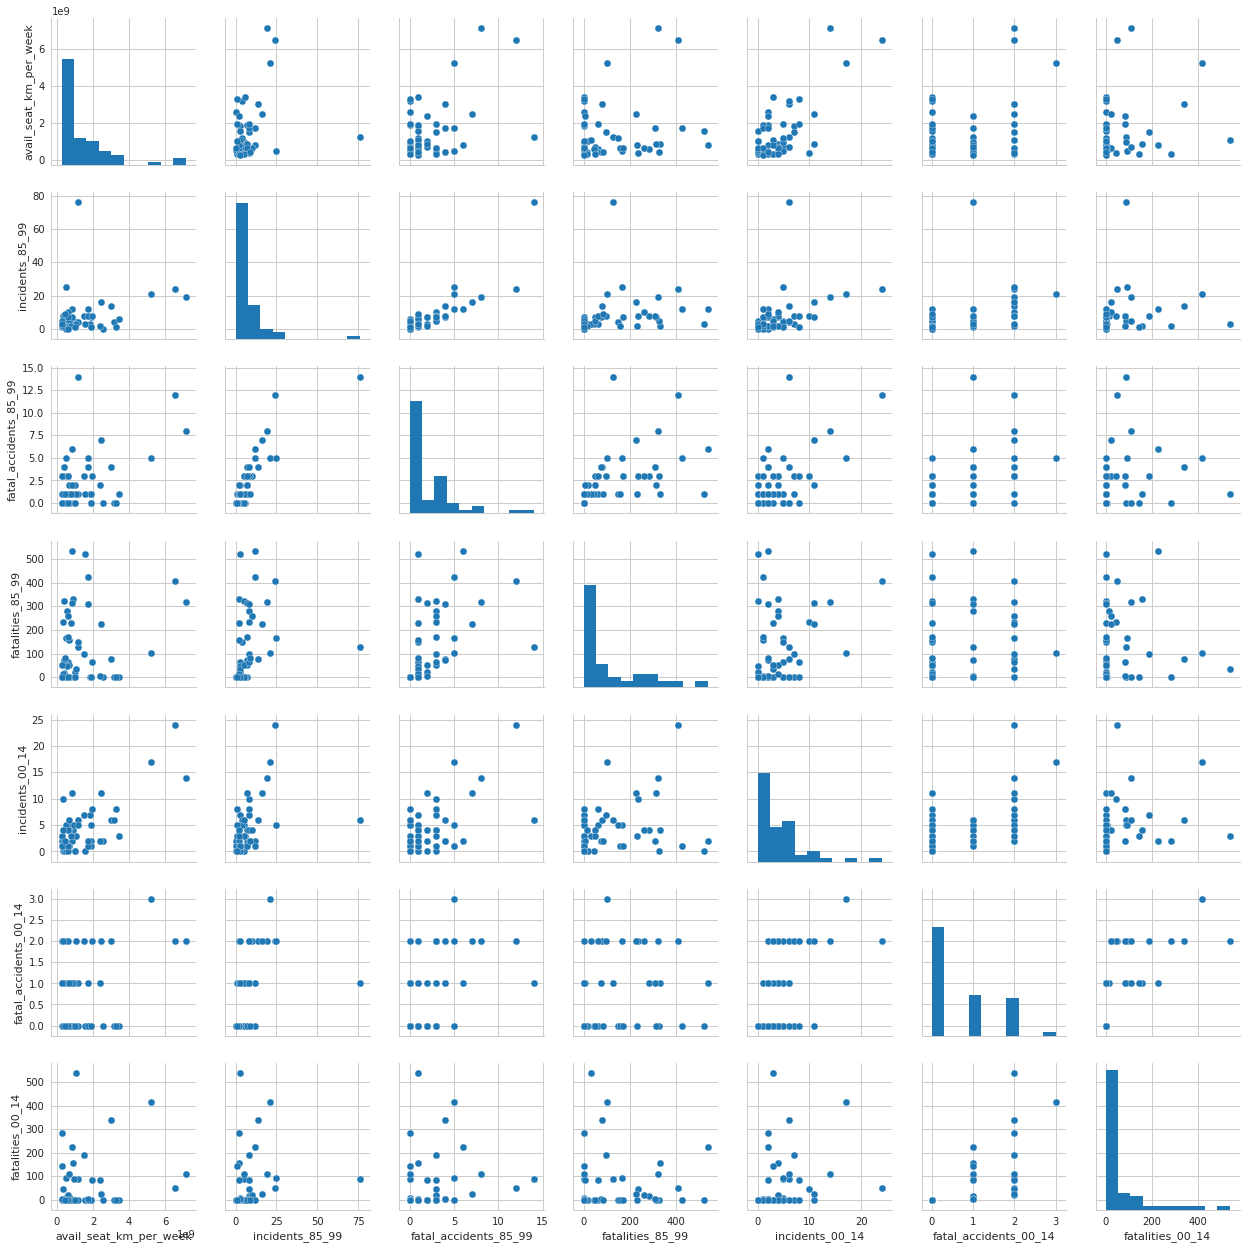

In [72]:
sns.set_context('notebook', font_scale=1)

sns.pairplot(df.drop(['total_incidents', 'total_fatal_accidents','total_fatalities'], axis=1))
#I'm not plotting the 'total' columns, otherwise the pairplot would be too large.

This is a large pairplot and it doesn't give us much information (there are only 56 rows, so that was expected)